# Detecting Hate Speech Using NLP on Twitter Data

<img src="dataset-cover.jpg" style="width:900px; height:450px"/>

## Project Overview

In today’s digital world, social media platforms have become essential arenas for public dialogue, particularly around politics. In Kenya, platforms like Twitter are not only used to share opinions and rally support but are also battlegrounds for targeted hate speech—especially toward political figures.

This project aims to develop a machine learning-based Natural Language Processing (NLP) system to detect hate speech in tweets directed at Kenyan politicians. By analyzing real tweets mentioning individuals such as the President,Deputy President, governors and many others, we seek to understand the patterns of online hate and create a model that classifies content as hate speech or not.

We will leverage standard NLP techniques—such as preprocessing, vectorization (TF-IDF or embeddings), and modeling using algorithms like Logistic Regression, Support Vector Machines, or transformer models like BERT. The project also incorporates exploratory data analysis (EDA) to uncover trends in hateful language, common keywords, and sentiment shifts.

***Imagine a Twitter-like platform where users can post freely. With this model in place, hate speech posts can be automatically flagged or hidden within seconds—drastically improving the experience for users and reducing platform liability.***


Ultimately, this work supports efforts in online safety, content moderation, and digital peacebuilding. The resulting model can assist social media teams, NGOs, and civic tech groups in identifying harmful political discourse in real time.

## Business Understanding
### Problem Statement
Kenyan politicians often face verbal attacks online, particularly during elections, political controversies, or ethnic debates. This hate speech can:

- Incite real-world violence

- Deepen ethnic divisions

- Harm reputations and mental well-being

- Undermine democratic participation

Manual moderation is slow and subjective, and harmful posts can go viral before they are taken down. An automated detection system is therefore critical for early intervention and risk mitigation.

### Project Goals
1. Detect hate speech in tweets directed at Kenyan political figures using supervised deep learning models.
2. Analyze trends in the language and frequency of political hate speech.
3. Provide insights and tools for moderation teams, researchers, and policy makers to take action against online toxicity.

### Key Stakeholders
1. Electoral bodies (IEBC, NCIC)

2. Civil rights NGOs (e.g., Amnesty Kenya, Ushahidi, Uchaguzi)

3. News media and fact-checking organizations

4. Government communication teams

5. Social media platforms (e.g., Twitter Kenya)

6. Academics and digital democracy researchers

### Metrics for Success

#### Model Evaluation Metrics
To evaluate our machine learning model’s effectiveness, we will track:

- Accuracy – How often the model predicts correctly

- Precision (Hate class) – % of flagged hate tweets that were actually hateful

- Recall (Hate class) – % of true hate tweets the model managed to detect

- F1 Score – A balance between precision and recall

- Confusion Matrix – A detailed view of false positives and false negatives

#### Business Impact Metrics
In addition to technical accuracy, we will evaluate the solution based on its real-world impact:

- Moderation efficiency – Reduction in time required for human review

- Detection speed – Time taken to flag hate speech from the moment it's posted

- Coverage fairness – Model performance across tweets targeting different politicians

- Explainability – Ability to justify flagged posts using explainable AI tools like SHAP or LIME


## Project Objectives
1. Build an NLP model to detect hate speech in tweets targeting Kenyan politicians.

2. Analyze linguistic patterns and trends in political hate speech.

3. Compare hate speech dynamics across different politicians.

4. Evaluate model performance using metrics like accuracy, precision, recall, and F1-score.

5. Provide insights to support content moderation and civic monitoring.

6. Establish a foundation for real-time or multilingual hate speech detection systems.

# Data Understanding
The dataset was collected from the Twitter (now X) platform through web scraping techniques, specifically using Tweepy and Twint's TwSearchExporter. The data focuses on tweets that reference prominent and vocal political figures in Kenya, including President William Ruto, Former Deputy President Rigathi Gachagua, Deputy President Kithure Kindiki, among others. The goal was to gather public sentiment and discourse surrounding these figures, particularly in the context of hate speech and offensive language.

The dataset comprises a total of 11,317 records with 6 columns, each representing distinct attributes related to the tweets. These include the tweet content, metadata (such as timestamps), and other contextual information useful for natural language processing tasks.

This dataset serves as the foundation for a hate speech classification project aimed at categorizing tweets into three classes: hate, offensive, and neutral.

The dataset comprises of the columns:

1. **Tweet ID**: A unique identifier assigned to each tweet. Useful for traceability and cross-referencing with Twitter's platform.
2. **Likes**: The number of likes a tweet received, indicating its popularity or approval from users.
3. **Retweets**: The number of times the tweet was retweeted, showing its spread across the platform.
4. **Total Replies**: The number of direct replies the tweet generated, reflecting user engagement and potential controversy.
5. **Texts**: The full textual content of the tweet. This is the primary feature used for natural language processing and classification tasks.
6. **Created At**: The timestamp of when the tweet was published, allowing for temporal analysis or filtering based on time periods.

## Exploring the dataset
Here our aim is to explore the data by asserting the columns and rows distribution, statistical distribution for the columns, and exploring the data types for each column

In [21]:
# Core Packages
!pip install numpy pandas scikit-learn

# Visualization
!pip install matplotlib seaborn plotly

# Transformers & Datasets
!pip install transformers datasets

# NLP Preprocessing
!pip install nltk spacy rapidfuzz

# Deployment Tools
!pip install fastapi uvicorn python-multipart nest_asyncio pyngrok

# Text Feature Extraction
!pip install scikit-learn

# (Optional) If you plan to use Jupyter or VSCode interactive
!pip install jupyter notebook

In [22]:
# Core Utilities & Environment
import os
import gc
import warnings
warnings.filterwarnings('ignore')

# Data Manipulation & Processing
import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import TruncatedSVD
from sklearn.utils.class_weight import compute_class_weight

# NLP Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import spacy
from rapidfuzz import process, fuzz
from scipy.sparse import hstack


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go


# Modeling & Transformers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import torch
from torch.nn import CrossEntropyLoss
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    Trainer,
    TrainingArguments,
    DataCollatorWithPadding,
    EarlyStoppingCallback
)

# Datasets
from datasets import Dataset as HFDataset

# Model Evaluation
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Feature Engineering & Dates
import calendar
from dateutil import easter

# Saving & Deployment Tools
import joblib
import nest_asyncio
from pyngrok import ngrok

# Text Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer


In [23]:
#Loading the dataset
data = pd.read_csv('Kenyan_politicians_hatespeech.csv')

data.head()

,Tweet ID,Likes,Retweets,Total Replies,Texts,Created At
0,1.912286e+18,2.0,0.0,1.0,Rigathi Gachagua ni snitches Ile ya ukweli. La...,2025-04-15 23:23:00+00:00
1,1.912285e+18,0.0,0.0,0.0,@NoCountryHere it’s different for Gachagua man...,2025-04-15 23:21:43+00:00
2,1.912278e+18,0.0,0.0,0.0,@gitaus794 @Mithika_Denno @bonifacemwangi Wher...,2025-04-15 22:52:56+00:00
3,1.912275e+18,0.0,0.0,0.0,@hermexinvesting @MwangiHub The common enemy o...,2025-04-15 22:40:45+00:00
4,1.912272e+18,0.0,0.0,0.0,SHOCK as Gachagua addresses MILLIONS of Mlolon...,2025-04-15 22:30:19+00:00


In [24]:
#Asserting the shape of the dataset
data.shape

(11715, 6)

In [25]:
#Checking column information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11715 entries, 0 to 11714
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tweet ID       11715 non-null  float64
 1   Likes          11715 non-null  float64
 2   Retweets       11715 non-null  float64
 3   Total Replies  11715 non-null  float64
 4   Texts          11715 non-null  object 
 5   Created At     11715 non-null  object 
dtypes: float64(4), object(2)
memory usage: 549.3+ KB


In [26]:
#Checking statistical information for numeric columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Tweet ID,11715.0,1.829613e+18,1.603489e+17,1.262900e+17,1.816162e+18,1.894016e+18,1.912250e+18,1.914318e+18
Likes,11715.0,9.192555e+02,1.424494e+04,0.000000e+00,1.000000e+00,1.400000e+01,3.090000e+02,1.060202e+06
Retweets,11715.0,1.970004e+02,2.248039e+03,0.000000e+00,0.000000e+00,4.000000e+00,5.400000e+01,1.504460e+05
Total Replies,11715.0,6.852591e+01,1.063107e+03,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+01,8.787900e+04


In [27]:
#Checking statistical informatio for categorical columns
data.describe(include = 'O').T

,count,unique,top,freq
Texts,11715,11241,"We must protect our children from paedophiles,...",7
Created At,11715,11228,2025-04-16 17:06:25+00:00,7


In [28]:
#Checking if the data has missing values
data.isnull().sum()

,0
Tweet ID,0
Likes,0
Retweets,0
Total Replies,0
Texts,0
Created At,0


In [29]:
#Checking for duplicates
data.duplicated().sum()

np.int64(398)

# Data Cleaning

In [30]:
#Saving a new copy to keep contents of the initial dataset
df = data.copy(deep=True)

In [31]:
#Confirm the saved copy
df.head()

,Tweet ID,Likes,Retweets,Total Replies,Texts,Created At
0,1.912286e+18,2.0,0.0,1.0,Rigathi Gachagua ni snitches Ile ya ukweli. La...,2025-04-15 23:23:00+00:00
1,1.912285e+18,0.0,0.0,0.0,@NoCountryHere it’s different for Gachagua man...,2025-04-15 23:21:43+00:00
2,1.912278e+18,0.0,0.0,0.0,@gitaus794 @Mithika_Denno @bonifacemwangi Wher...,2025-04-15 22:52:56+00:00
3,1.912275e+18,0.0,0.0,0.0,@hermexinvesting @MwangiHub The common enemy o...,2025-04-15 22:40:45+00:00
4,1.912272e+18,0.0,0.0,0.0,SHOCK as Gachagua addresses MILLIONS of Mlolon...,2025-04-15 22:30:19+00:00


In [32]:
# Dropping unwanted column
df = df.drop(columns=['Tweet ID'])

In [33]:
#Confirming the changes
df_columns = df.columns
print(df_columns)

Index(['Likes', 'Retweets', 'Total Replies', 'Texts', 'Created At'], dtype='object')


In [34]:
# Convert to numeric columns to integers
df['Likes'] = pd.to_numeric(df['Likes'], errors='coerce')
df['Retweets'] = pd.to_numeric(df['Retweets'], errors='coerce')
df['Total Replies'] = pd.to_numeric(df['Total Replies'], errors='coerce')

# Convert date column
df['Created At'] = pd.to_datetime(df['Created At'], errors='coerce')

In [35]:
# Clean text column
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www.\S+', '', text)  # remove URLs
    text = re.sub(r'@\w+', '', text)  # remove mentions
    text = re.sub(r'#\w+', '', text)  # remove hashtags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # remove punctuation and numbers
    text = re.sub(r'\s+', ' ', text).strip()  # normalize whitespace
    return text

df['Cleaned_Text'] = df['Texts'].apply(clean_text)

In [36]:
#Confirming cleaned text has been added
df.head()

,Likes,Retweets,Total Replies,Texts,Created At,Cleaned_Text
0,2.0,0.0,1.0,Rigathi Gachagua ni snitches Ile ya ukweli. La...,2025-04-15 23:23:00+00:00,rigathi gachagua ni snitches ile ya ukweli laz...
1,0.0,0.0,0.0,@NoCountryHere it’s different for Gachagua man...,2025-04-15 23:21:43+00:00,its different for gachagua man dont underestim...
2,0.0,0.0,0.0,@gitaus794 @Mithika_Denno @bonifacemwangi Wher...,2025-04-15 22:52:56+00:00,wheres gachagua with his political leprosy
3,0.0,0.0,0.0,@hermexinvesting @MwangiHub The common enemy o...,2025-04-15 22:40:45+00:00,the common enemy outside mt kenya is gachagua ...
4,0.0,0.0,0.0,SHOCK as Gachagua addresses MILLIONS of Mlolon...,2025-04-15 22:30:19+00:00,shock as gachagua addresses millions of mlolon...


In [37]:
 #Insert the new column(Label) after 'cleaned_text'
col_index = df.columns.get_loc('Cleaned_Text') + 1  # position after 'cleaned_text'
df.insert(loc=col_index, column='Label', value= '')  # or value='pending' or ''

In [38]:
# Convert to categorical columns
df['Cleaned_Text'] = df['Cleaned_Text'].astype('category')
df['Label'] = df['Label'].astype('category')

In [39]:
 #Convert to categorical columns
df['Cleaned_Text'] = df['Cleaned_Text'].astype('category')
df['Label'] = df['Label'].astype('category')

In [40]:
# Cleaning column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [41]:
#Dropping the original text column
df = df.drop(columns=['texts'])
df.columns

Index(['likes', 'retweets', 'total_replies', 'created_at', 'cleaned_text',
       'label'],
      dtype='object')

In [42]:
#Saving the cleaned text for labeling
df.to_csv('kenyan_politics_cleaned_text.csv', index=False)

## Labeling of the texts

#### Labeling Strategy

Given the linguistic characteristics of our dataset, we opted for a manual labeling approach. A significant portion of the tweets are written in Sheng, a hybrid sociolect that blends English and Swahili, and is widely spoken in urban areas of Kenya. Sheng is highly dynamic, context-dependent, and culturally nuanced—posing unique challenges for automated natural language processing tools, especially pre-trained models which lack exposure to this evolving vernacular.

At present, there are no existing models or datasets that can effectively interpret and label Sheng text with high accuracy. Most multilingual language models fail to grasp the contextual depth, code-switching patterns, and slang prevalent in this language. As native speakers and individuals well-acquainted with the social and political landscape of Kenya, we leveraged our linguistic and cultural understanding to perform manual annotation of the tweets.

Each tweet was carefully reviewed and labeled into one of three categories:

1. Hate – content expressing hateful, discriminatory, offensive or inciting language.

2. Not hate – content that is informative, benign, it is neither hateful nor offensive.

This manual process ensures high-quality annotations that are contextually accurate and culturally relevant, forming a reliable foundation for training an effective hate speech classification model.

Our approach was to save the cleaned dataset inform of csv and label  manually from Excel.

In [43]:
#Loading the labeled dataset
df1 = pd.read_csv('labeled_kenyan_hatespeech.csv')

In [44]:
# Apply .lower() to every string cell in the DataFrame
df1 = df1.applymap(lambda x: x.lower() if isinstance(x, str) else x)

In [45]:
# Sample DataFrame
# Make sure labels are lowercase for mapping consistency
df1['label'] = df1['label'].str.lower()

# Map 3-class to binary
binary_map = {
    'hate': 'Hate',
    'offensive': 'Hate',
    'neutral': 'Not_Hate'
}

df1['label'] = df1['label'].map(binary_map)

In [46]:
df1.to_csv('updated_labeled_kenyan_hatespeech.csv')

We can further explore the labeled data for any abnormalities

In [47]:
df1.head()

,Unnamed: 0,likes,retweets,total_replies,created_at,cleaned_text,label
0,0,39,2,0,2024-07-30 10:27:22+00:00,former ig japheth koome should be taken to icc...,Not_Hate
1,1,0,0,0,2024-07-31 07:12:21+00:00,my views japheth koome should be charged prose...,Not_Hate
2,2,5,5,0,2024-07-20 10:43:30+00:00,at this rate we might as well have ig japheth ...,Not_Hate
3,3,593,248,114,2024-07-12 18:31:05+00:00,kenyas police chief japhet koome has resigned ...,Not_Hate
4,4,6,4,0,2024-09-29 21:45:26+00:00,japheth koomes resignation has resulted in the...,Not_Hate


In [48]:
df1.shape

(9701, 7)

In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9701 entries, 0 to 9700
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     9701 non-null   int64 
 1   likes          9701 non-null   int64 
 2   retweets       9701 non-null   int64 
 3   total_replies  9701 non-null   int64 
 4   created_at     9701 non-null   object
 5   cleaned_text   9701 non-null   object
 6   label          9701 non-null   object
dtypes: int64(4), object(3)
memory usage: 530.7+ KB


In [50]:
#Checking the null values
df1.isnull().sum()

,0
Unnamed: 0,0
likes,0
retweets,0
total_replies,0
created_at,0
cleaned_text,0
label,0


In [51]:
df1.drop(columns=['Unnamed: 0'],inplace=True,axis=1)

In [52]:
#Checking the duplicates
df1.duplicated().sum()

np.int64(282)

In [53]:
#Dropping the null values
df1.dropna(subset=['cleaned_text'], inplace=True)


In [54]:
#Dropping the duplicates
df1.drop_duplicates(inplace=True)

In [55]:
#Confirming changes
df1.isnull().sum().any()

np.False_

In [56]:
#Confirming elimination of all the duplicates
df1.duplicated().sum()

np.int64(0)

In [57]:
#Confirming the changes
df1['label'].value_counts()

,count
label,
Not_Hate,5838
Hate,3581


In [58]:
#Loading the final shape of the dataset
df1.shape

(9419, 6)

# Feature Engineering
Feature engineering is a critical step in preparing the dataset for analysis and modeling. It involves creating new features that better represent the underlying patterns in the data. Below are the engineered features and the reasoning behind their inclusion:

### Columns Used for Feature Engineering

- **likes**, **retweets**, **total_replies**
  - These three metrics reflect user engagement with a tweet. Individually, they are important, but combined, they can offer a more comprehensive view.

- **cleaned_text**
  - The cleaned tweet content is used to extract linguistic features like length, word count, hashtags, and mentions, which help understand the structure and purpose of a tweet.

- **created_at**
  - This datetime field is used to derive time-based patterns, such as when a politician is trending or how tweet activity varies by season, hour, or weekday.

---

### New Features Created

- **engagement_score** = likes + retweets + total_replies  
  → A unified metric to measure tweet popularity or user response.

- **tweet_length**  
  → Total number of characters in a tweet. Longer tweets may carry more detail or stronger sentiment.

- **word_count**  
  → Number of words in a tweet. Helps analyze verbosity or messaging style.

- **hour**, **day**, **month**, **year**, **day_of_week**, **season**


→ Helps analyze temporal trends in tweet activity and engagement, including political events or public sentiment surges.


---

These engineered features help improve the interpretability of the dataset and enhance the performance.


In [59]:
df1.sample(50)

,likes,retweets,total_replies,created_at,cleaned_text,label
5065,4675,845,29,2024-08-30 21:58:12+00:00,opiyo wandayi is not even a month old in offic...,Hate
624,0,0,0,2025-04-08 14:56:50+00:00,on kahariris political comment on the youths m...,Not_Hate
7325,4,0,0,2024-12-25 18:10:20+00:00,i dont give a damn if they abduct or kill me t...,Hate
2420,0,0,0,2025-04-15 19:32:00+00:00,i dont worship anyone i have been supporting r...,Not_Hate
7878,1997,783,162,2024-10-07 08:05:30+00:00,it seems plans had been made much earlier that...,Not_Hate
8109,6,11,1,2025-04-11 04:11:44+00:00,the powers and privileges committee of the sen...,Hate
4801,189,0,0,2024-06-07 13:12:10+00:00,great catching up with mp of kiharu constituen...,Hate
7522,0,0,0,2025-04-14 18:01:16+00:00,ichungwa keep dreaming,Not_Hate
765,1,1,0,2025-04-16 20:48:07+00:00,am i the only one who like karen nyamus vibe c...,Not_Hate
2458,6,5,0,2025-04-16 08:38:58+00:00,tip starz gg only picks odds code tqddr create...,Hate


### 1. Engagement Score (likes, retweets, and replies)

In [60]:
# Calculate combined engagement
df1['engagement_score'] = df1['likes'] + df1['retweets'] + df1['total_replies']

### 2. Tweet Length (number of characters)

In [61]:
df1['text_length'] = df1['cleaned_text'].apply(len)
df1['text_length'].head(5)

,text_length
0,74
1,120
2,104
3,246
4,273


### 3. Engagement bins for likes, retweets, replies and the total engagement

In [62]:
# Binning individual engagement types
df1['likes_bin'] = pd.cut(df1['likes'], bins=[-1, 0, 10, 100, 1000, 10000,100000], labels=['0', '1-10', '11-100', '101-1k', '1001-10k','10k+'])
df1['retweets_bin'] = pd.cut(df1['retweets'], bins=[-1, 0, 10, 100, 1000, 10000, 100000], labels=['0', '1-10', '11-100', '101-1k', '1001-10k','10k+'])
df1['replies_bin'] = pd.cut(df1['total_replies'], bins=[-1, 0, 10, 100, 1000, 10000, 100000], labels=['0', '1-10', '11-100', '101-1k', '1001-10k','10k+'])
df1['engagement_bin'] = pd.cut(df1['engagement_score'], bins=[-1, 0, 10, 100, 1000, 10000, 100000], labels=['0', '1-10', '11-100', '101-1k', '1001-10k', '10k+'])

### 4. Add a wordcount and text length column

In [63]:
 #Add word count column
df1['word_count'] = df1['cleaned_text'].apply(lambda x: len(str(x).split()))

### 5. Extract Named Entities of Type PERSON (e.g., politicians)

In [64]:
# Ensure cleaned_text is treated as regular string (not categorical)
df1['cleaned_text'] = df1['cleaned_text'].astype(str)

# 1. Define canonical names and their known aliases/nicknames (global dictionary)
alias_to_canonical = {
    'william ruto': 'William Ruto',
    'ruto': 'William Ruto',
    'zakayo': 'William Ruto',
    'el chapo': 'William Ruto',
    'raila odinga': 'Raila Odinga',
    'raila': 'Raila Odinga',
    'baba': 'Raila Odinga',
    'tinga': 'Raila Odinga',
    'martha karua': 'Martha Karua',
    'iron lady': 'Martha Karua',
    'rigathi gachagua': 'Rigathi Gachagua',
    'riggy g': 'Rigathi Gachagua',
    'riggy': 'Rigathi Gachagua',
    'musalia mudavadi': 'Musalia Mudavadi',
    'mudavadi': 'Musalia Mudavadi',
    'prime cs': 'Musalia Mudavadi',
    'kithure kindiki': 'Kithure Kindiki',
    'kindiki': 'Kithure Kindiki',
    'aden duale': 'Aden Duale',
    'duale': 'Aden Duale',
    'martha koome': 'Martha Koome',
    'fred matiangi': 'Fred Matiang’i',
    'matiangi': 'Fred Matiang’i',
    'johnson sakaja': 'Johnson Sakaja',
    'sakaja': 'Johnson Sakaja',
    'noordin haji': 'Noordin Haji',
    'japheth koome': 'Japheth Koome',
    'rachel ruto': 'Rachel Ruto',
    'mama rachel': 'Rachel Ruto',
    'oscar sudi': 'Oscar Sudi',
    'sudi': 'Oscar Sudi',
    'moses kuria': 'Moses Kuria',
    'kalonzo musyoka': 'Kalonzo Musyoka',
    'musyoka': 'Kalonzo Musyoka',
    'gloria orwoba': 'Gloria Orwoba',
    'john kiarie': 'John Kiarie',
    'didmus barasa': 'Didmus Barasa',
    'betty maina': 'Betty Maina',
    'alice nganga': 'Alice Nganga',
    'karambu': 'Martha Karua',
}

import re

def extract_politicians(text):
    found = set()
    lower_text = text.lower()
    for alias, canonical in alias_to_canonical.items():
        if re.search(r'\b' + re.escape(alias) + r'\b', lower_text):
            found.add(canonical)
    return list(found) if found else None

# Apply extraction
df1['politicians'] = df1['cleaned_text'].apply(extract_politicians)


# Check the results
print(df1[['cleaned_text', 'politicians']].head())

                                        cleaned_text      politicians
0  former ig japheth koome should be taken to icc...  [Japheth Koome]
1  my views japheth koome should be charged prose...  [Japheth Koome]
2  at this rate we might as well have ig japheth ...  [Japheth Koome]
3  kenyas police chief japhet koome has resigned ...             None
4  japheth koomes resignation has resulted in the...             None


### Standardize the entity names without dropping

In [65]:
# Prepare and clean entity strings
entities_series = df1['politicians'].fillna('').astype(str).str.lower().str.split(',')
all_entities = [name.strip() for sublist in entities_series for name in sublist if name.strip()]

# Build a frequency counter to prioritize common names
from collections import Counter
entity_counts = Counter(all_entities)

# Get unique names
unique_entities = list(entity_counts.keys())

# Map similar names to a representative (canonical) name
canonical_map = {}
used = set()

for name in unique_entities:
    if name in used:
        continue
    matches = process.extract(
        name, unique_entities, scorer=fuzz.token_sort_ratio, limit=None
    )
    # Group names with similarity > 90
    similar_names = [match for match, score, _ in matches if score > 90]
    for sim in similar_names:
        canonical_map[sim] = name
        used.add(sim)

# Apply mapping to original DataFrame
def standardize_entities(entity_list):
    # Handle missing or invalid entries
    if entity_list is None or isinstance(entity_list, float) and np.isnan(entity_list):
        return ''
    if isinstance(entity_list, str):
        try:
            entity_list = ast.literal_eval(entity_list)
        except:
            return entity_list  # return the string if not a list-like string

    if not isinstance(entity_list, list):
        return ''

    std_names = [canonical_map.get(name.lower(), name) for name in entity_list]
    return ', '.join(sorted(set(std_names)))

df1['politicians_standardized'] = df1['politicians'].apply(standardize_entities)

In [66]:
# Explode comma-separated names into individual rows
df1['politicians_standardized'] = df1['politicians_standardized'].astype(str)
df1 = df1.assign(
    clean_names = df1['politicians_standardized'].str.split(',')
).explode('clean_names')

# Remove whitespace and drop empty or null values
df1['clean_names'] = df1['clean_names'].str.strip()

df1 = df1.explode('clean_names')

# Strip whitespace, replace empty with NaN, then fill with 'unknown'
df1['clean_names'] = df1['clean_names'].str.strip()
df1['clean_names'] = df1['clean_names'].replace('', np.nan)
df1['clean_names'] = df1['clean_names'].fillna('unknown')

# (Optional) Reset index if needed
df1.reset_index(drop=True, inplace=True)

### 6. Extract Time Features

In [67]:
def extract_time_features(df1, datetime_col='created_at'):
    """
    Extracts time-based features from a datetime column.
    Adds: year, month, day, hour, day_of_week
    Skips rows where datetime_col is missing.
    """
    # Ensure datetime format
    df1[datetime_col] = pd.to_datetime(df1[datetime_col], errors='coerce')

    # Only apply on non-null datetime values
    mask = df1[datetime_col].notnull()

    df1.loc[mask, 'year'] = df1.loc[mask, datetime_col].dt.year
    df1.loc[mask, 'month'] = df1.loc[mask, datetime_col].dt.month
    df1.loc[mask, 'day'] = df1.loc[mask, datetime_col].dt.day
    df1.loc[mask, 'hour'] = df1.loc[mask, datetime_col].dt.hour
    df1.loc[mask, 'day_of_week'] = df1.loc[mask, datetime_col].dt.day_name()

    return df1

df1 = extract_time_features(df1)  # This ensures 'year' and other time features exist

#### 6.1. Define Fixed Holidays

In [68]:
def add_named_holidays(df1):
    fixed_holidays = {
        '01-01': "New Year's Day",
        '05-01': "Labour Day",
        '06-01': "Madaraka Day",
        '10-20': "Mashujaa Day",
        '12-12': "Jamhuri Day",
        '12-25': "Christmas Day",
        '12-26': "Boxing Day"
    }

    # Eid dates
    eid_dates = {
        2015: {'Eid al-Fitr': '07-17', 'Eid al-Adha': '09-24'},
        2016: {'Eid al-Fitr': '07-06', 'Eid al-Adha': '09-12'},
        2017: {'Eid al-Fitr': '06-25', 'Eid al-Adha': '09-01'},
        2018: {'Eid al-Fitr': '06-15', 'Eid al-Adha': '08-21'},
        2019: {'Eid al-Fitr': '06-04', 'Eid al-Adha': '08-11'},
        2020: {'Eid al-Fitr': '05-24', 'Eid al-Adha': '07-31'},
        2021: {'Eid al-Fitr': '05-13', 'Eid al-Adha': '07-20'},
        2022: {'Eid al-Fitr': '05-02', 'Eid al-Adha': '07-09'},
        2023: {'Eid al-Fitr': '04-21', 'Eid al-Adha': '06-28'},
        2024: {'Eid al-Fitr': '04-10', 'Eid al-Adha': '06-17'},
        2025: {'Eid al-Fitr': '03-30', 'Eid al-Adha': '06-06'},
    }

    # Easter dates
    easter_dates = {
        2015: '04-05',
        2016: '03-27',
        2017: '04-16',
        2018: '04-01',
        2019: '04-21',
        2020: '04-12',
        2021: '04-04',
        2022: '04-17',
        2023: '04-09',
        2024: '03-31',
        2025: '04-20',
    }

    df1['holiday_name'] = None

    for idx, row in df1.iterrows():
        if pd.isna(row['year']):
            continue  # Skip rows without year

        month_day = row['created_at'].strftime('%m-%d')
        year = int(row['year'])

        # Fixed holidays
        if month_day in fixed_holidays:
            df1.at[idx, 'holiday_name'] = fixed_holidays[month_day]

        # Easter-based holidays
        if year in easter_dates:
            easter_day = pd.to_datetime(f"{year}-{easter_dates[year]}")
            if month_day == (easter_day - pd.Timedelta(days=2)).strftime('%m-%d'):
                df1.at[idx, 'holiday_name'] = "Good Friday"
            elif month_day == (easter_day + pd.Timedelta(days=1)).strftime('%m-%d'):
                df1.at[idx, 'holiday_name'] = "Easter Monday"

        # Eid holidays
        if year in eid_dates:
            for name, eid_md in eid_dates[year].items():
                if month_day == eid_md:
                    df1.at[idx, 'holiday_name'] = name

    return df1
df1 = add_named_holidays(df1)

In [69]:
df1 = add_named_holidays(df1)
df1['holiday_name'].value_counts()

,count
holiday_name,
Easter Monday,503
Good Friday,311
Christmas Day,66
Boxing Day,66
Eid al-Fitr,33
Mashujaa Day,10
Jamhuri Day,9
Eid al-Adha,9
Labour Day,9


In [70]:
# Filling not_holiday with none values
df1['holiday_name'] = df1['holiday_name'].replace({None: 'not_holiday'}).fillna('not_holiday')

In [71]:
# Dropping unwanted column
df1 = df1.drop(columns=['politicians'])

### 5. Outlier detection

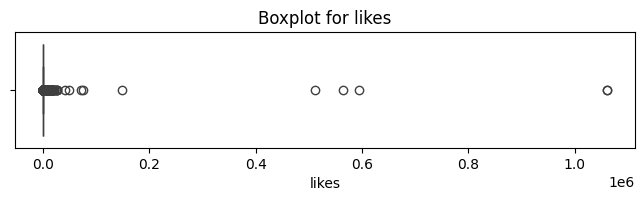

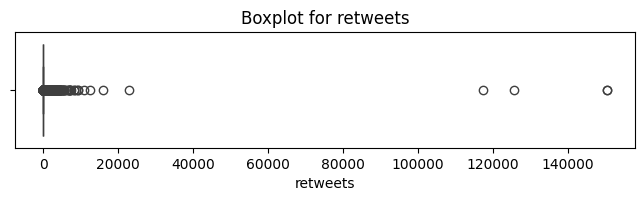

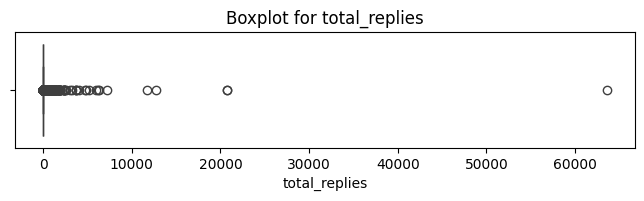

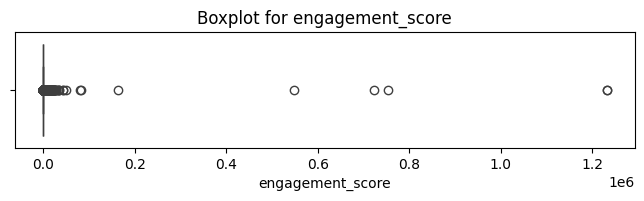

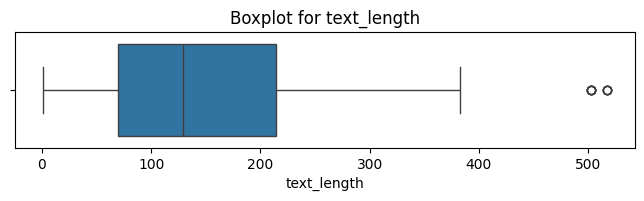

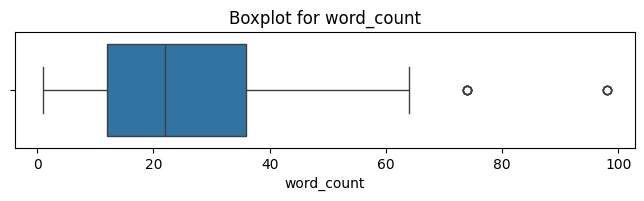

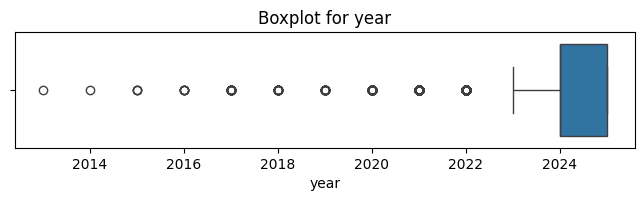

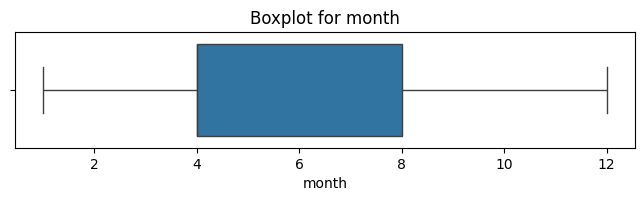

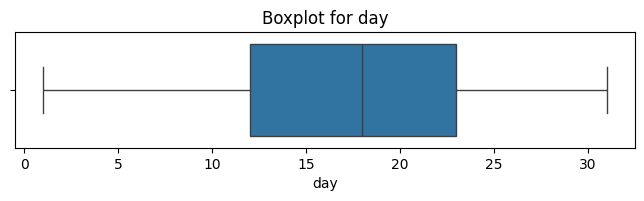

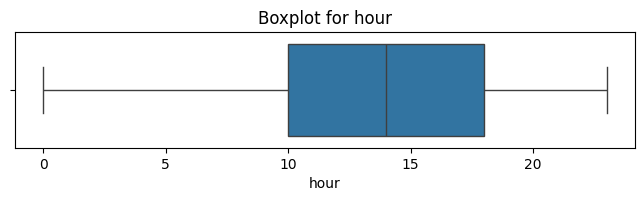

In [72]:
# Select only numeric columns
numeric_cols = ['likes', 'retweets', 'total_replies', 'engagement_score',
                'text_length', 'word_count', 'year', 'month', 'day', 'hour']

for col in numeric_cols:
    plt.figure(figsize=(8, 1.5))
    sns.boxplot(x=df1[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

**Observations**

- The data is spread out: The whiskers extend from around 1 to 12, indicating that the data points range across almost the entire possible spectrum for the "month" variable (presumably months of the year).

- The interquartile range (IQR) is between approximately 4 and 8: The box itself spans from roughly 4 to 8 on the x-axis. This means that the middle 50% of the data falls within this range.

- The median is around 6: The line inside the box, representing the median, appears to be close to the value of 6. This suggests that half of the data points are below 6 and half are above.

- The distribution appears somewhat symmetrical: The median is relatively centered within the box, and the whiskers are of roughly similar lengths. This hints that the distribution of the data might not be heavily skewed in either direction.
There are no apparent outliers: There are no individual data points plotted outside the whiskers, which suggests that there aren't any extreme values in this dataset for the "month" variable.

However since these numerical features are crucial for our analysis we have decided not to eliminate the outliers.

In [ ]:
df1.head()

,likes,retweets,total_replies,created_at,cleaned_text,label,engagement_score,text_length,likes_bin,retweets_bin,...,engagement_bin,word_count,politicians_standardized,clean_names,year,month,day,hour,day_of_week,holiday_name
0,39,2,0,2024-07-30 10:27:22+00:00,former ig japheth koome should be taken to icc...,Not_Hate,41,74,11-100,1-10,...,11-100,13,Japheth Koome,Japheth Koome,2024.0,7.0,30.0,10.0,Tuesday,not_holiday
1,0,0,0,2024-07-31 07:12:21+00:00,my views japheth koome should be charged prose...,Not_Hate,0,120,0,0,...,0,18,Japheth Koome,Japheth Koome,2024.0,7.0,31.0,7.0,Wednesday,not_holiday
2,5,5,0,2024-07-20 10:43:30+00:00,at this rate we might as well have ig japheth ...,Not_Hate,10,104,1-10,1-10,...,1-10,19,Japheth Koome,Japheth Koome,2024.0,7.0,20.0,10.0,Saturday,not_holiday
3,593,248,114,2024-07-12 18:31:05+00:00,kenyas police chief japhet koome has resigned ...,Not_Hate,955,246,101-1k,101-1k,...,101-1k,37,,unknown,2024.0,7.0,12.0,18.0,Friday,not_holiday
4,6,4,0,2024-09-29 21:45:26+00:00,japheth koomes resignation has resulted in the...,Not_Hate,10,273,1-10,1-10,...,1-10,43,,unknown,2024.0,9.0,29.0,21.0,Sunday,not_holiday


# Exploratory Data Analysis (EDA)

## Univariate Analysis

### Univariate Analysis For Numeric Data

#### Social Media Metrics Distribution

likes: Skewness = 51.04, Kurtosis = 2811.20
retweets: Skewness = 48.49, Kurtosis = 2480.69
total_replies: Skewness = 66.11, Kurtosis = 5341.96
engagement_score: Skewness = 50.28, Kurtosis = 2716.79
text_length: Skewness = 0.27, Kurtosis = -0.94
word_count: Skewness = 0.35, Kurtosis = -0.77
year: Skewness = -2.89, Kurtosis = 12.01
month: Skewness = 0.71, Kurtosis = -0.75
day: Skewness = -0.16, Kurtosis = -0.67
hour: Skewness = -0.34, Kurtosis = -0.30


<Axes: xlabel='likes', ylabel='Count'>

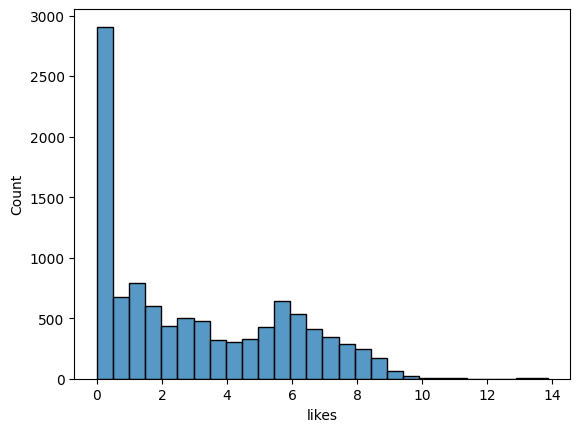

In [ ]:
#print("\n--- Skewness & Kurtosis ---")
for col in numeric_cols:
    if df1[col].dtype != 'object':
        skew = df1[col].skew()
        kurt = df1[col].kurtosis()
        print(f"{col}: Skewness = {skew:.2f}, Kurtosis = {kurt:.2f}")

sns.histplot(np.log1p(df1['likes']))

#### Key Insights & Recommendations
1. High skewness + high kurtosis (likes, retweets, replies, engagement):
- These are heavily imbalanced.

> Insight: Most tweets have low engagement, but a few go viral.

**Recommendation:**

- Consider log transformation (e.g., log1p(x)) to reduce skewness.

- Use robust statistical methods or models less sensitive to outliers.

2. Normal or near-normal features (tweet_length, word_count):
- Good for most statistical analyses.

> Might not need transformation.

3. Year skewed left:
- Could indicate that more data is from recent years.

- Check data distribution over time.

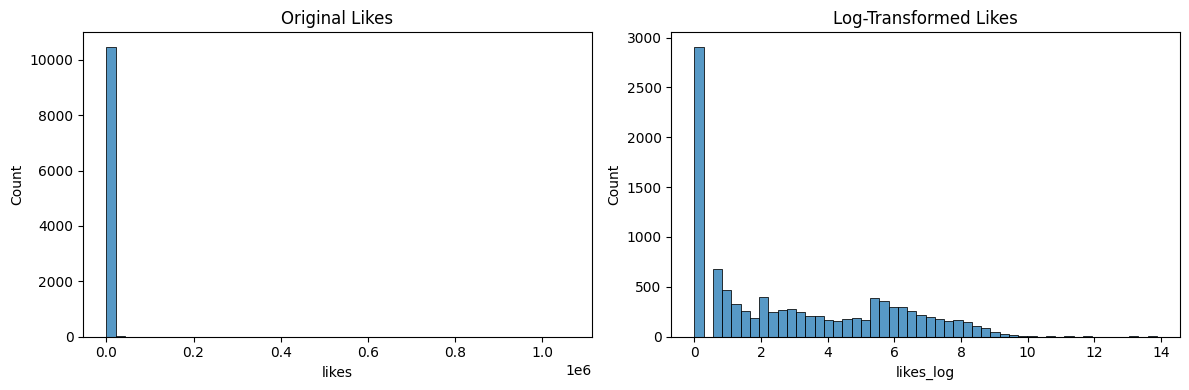

In [ ]:
df1['likes_log'] = np.log1p(df1['likes'])
df1['retweets_log'] = np.log1p(df1['retweets'])
df1['total_replies_log'] = np.log1p(df1['total_replies'])
df1['engagement_score_log'] = np.log1p(df1['engagement_score'])


fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df1['likes'], ax=axes[0], bins=50)
axes[0].set_title("Original Likes")

sns.histplot(df1['likes_log'], ax=axes[1], bins=50)
axes[1].set_title("Log-Transformed Likes")
plt.tight_layout()
plt.show()


**Observations**

- Likes Dominate: It's immediately clear that the number of likes tends to be significantly higher than both retweets and total replies. The box plot for 'likes' is positioned much higher on the value scale.

- Low Engagement for Replies: The 'total_replies' metric shows the lowest values overall. The box plot is clustered very close to zero, suggesting that the posts in this dataset generally receive a very small number of direct replies.

- Retweets in the Middle: The distribution of 'retweets' falls somewhere in between likes and total replies. While not as high as likes, there are noticeably more retweets than direct replies.


#### Text length distribution

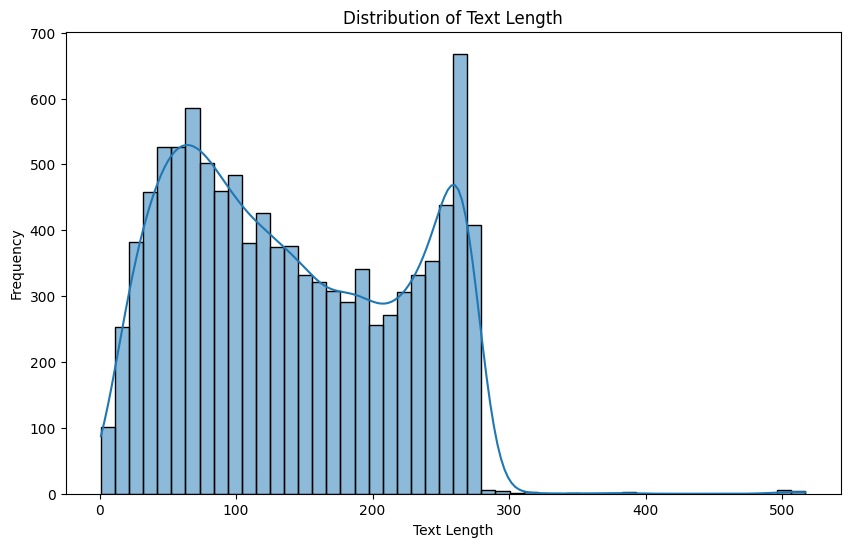

In [ ]:
# Overall text length distribution
plt.figure(figsize=(10, 6))
sns.histplot(df1['text_length'], bins=50, kde=True)
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


**Observations**

The distribution of text length is right-skewed, with the highest concentration of texts between 10 and 15 words, and additional smaller peaks around 25 and 40 words, indicating the presence of multiple text types.

#### Distribution of Engagement Score

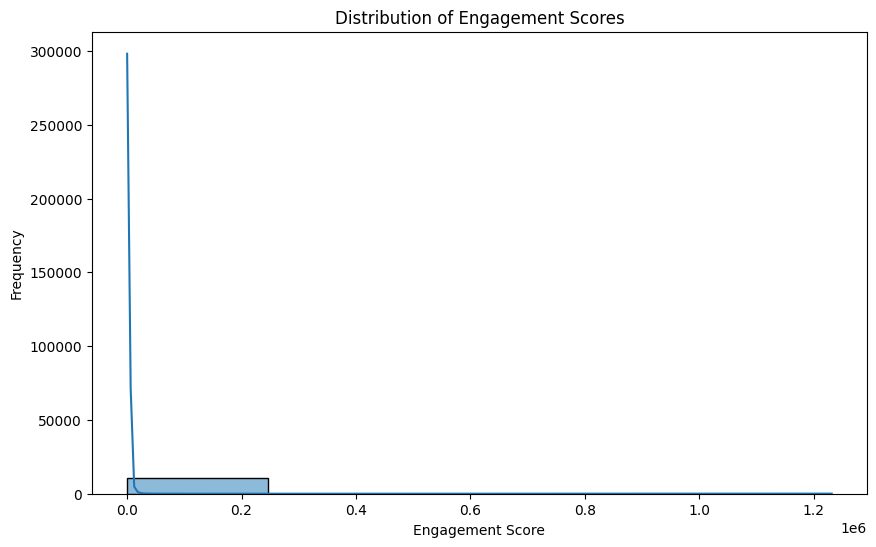

In [ ]:
# Engagement score distribution
plt.figure(figsize=(10, 6))
sns.histplot(df1['engagement_score'], bins=5, kde=True)
plt.title('Distribution of Engagement Scores')
plt.xlabel('Engagement Score')
plt.ylabel('Frequency')
plt.show()


**Observations**

- Highly Skewed Distribution: The distribution is heavily skewed to the right. Most of the engagement scores are concentrated at the lower end of the scale (below 0.25 million), with a long tail extending towards much higher values.

- Low Frequency of High Engagement: The curve indicates that very high engagement scores are quite rare. The frequency drops off dramatically as the engagement score increases.



#### Distribution of Sentiment Score

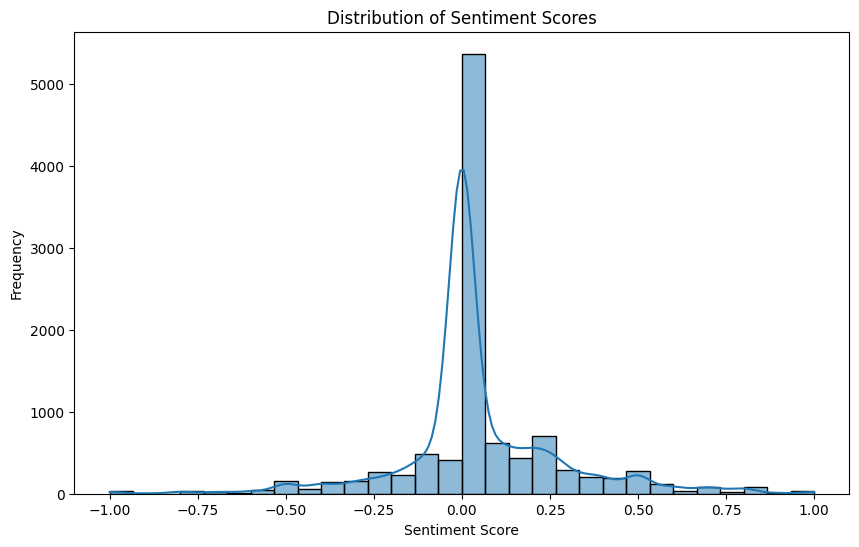

In [ ]:
from textblob import TextBlob

# Function to get sentiment score
def get_sentiment(text):
  analysis = TextBlob(text)
  return analysis.sentiment.polarity

# Apply the function to your text data
df1['sentiment_score'] = df1['cleaned_text'].apply(get_sentiment)

# Sentiment classification
def classify_sentiment(score):
  if score > 0:
    return 'Positive'
  elif score < 0:
    return 'Negative'
  else:
    return 'Neutral'

df1['sentiment_label'] = df1['sentiment_score'].apply(classify_sentiment)

# Ploting Sentiment Scores
plt.figure(figsize=(10, 6))
sns.histplot(df1['sentiment_score'], bins=30, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

**Observations**
- The sentiment scores are symmetrically distributed around 0, indicating a balance between positive and negative sentiments.
- Most scores cluster near zero, suggesting neutral or mildly positive/negative sentiments dominate, while extreme scores (close to -1 or 1) are less frequent.
- The distribution peaks at 0.00, highlighting a prevalence of neutral sentiment.


### Univariate Analysis For Categorical Data

#### Distribution of Labels

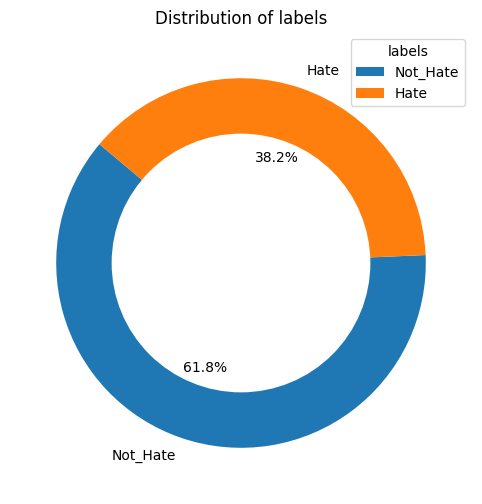

In [ ]:
# count of the labels
label_count = df1['label'].value_counts()

# create a piplot to show thw distribution
plt.figure(figsize=(8,6))
plt.pie(label_count, labels=label_count.index, autopct='%1.1f%%', startangle=140)

# create a blank circle at the centre
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# customize the plot
plt.title("Distribution of labels")
plt.legend(title="labels", loc="upper right")
plt.show()

**Observations**

- The  chart visually depicts a significant class imbalance in the dataset.

- The "not_hate" class has the highest percentage of 61.8%, and "hate" 38.2%  

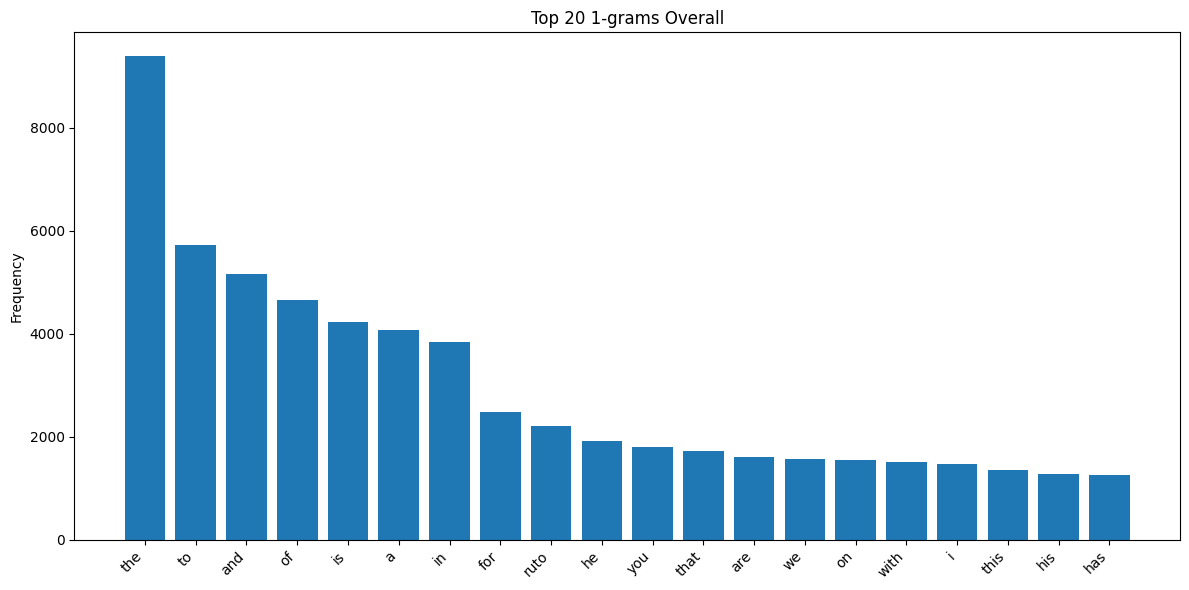

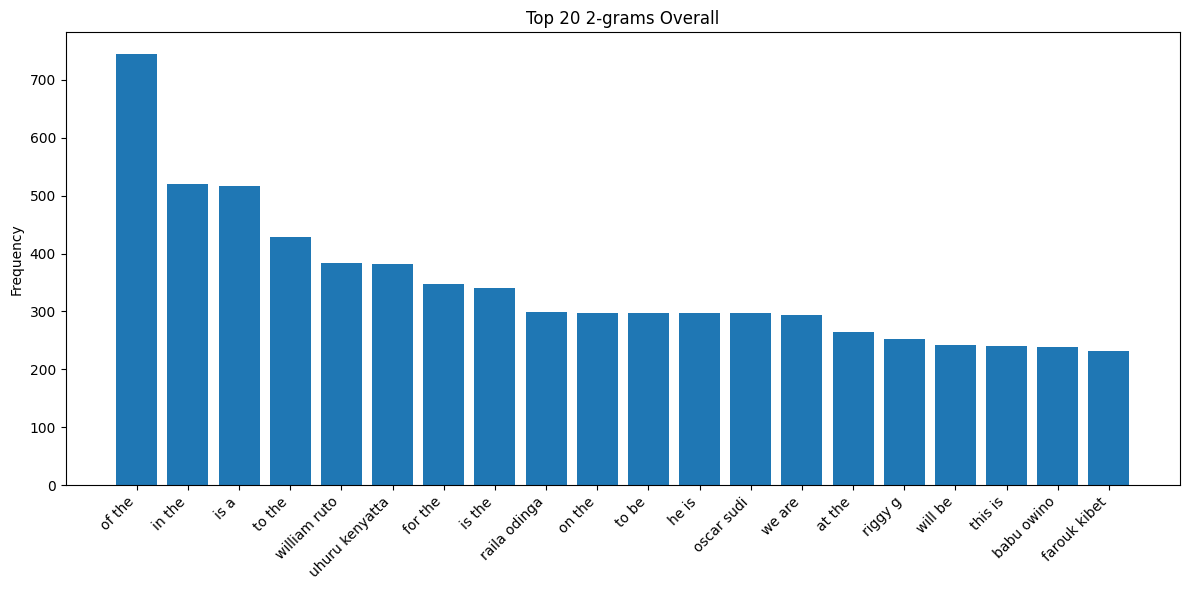

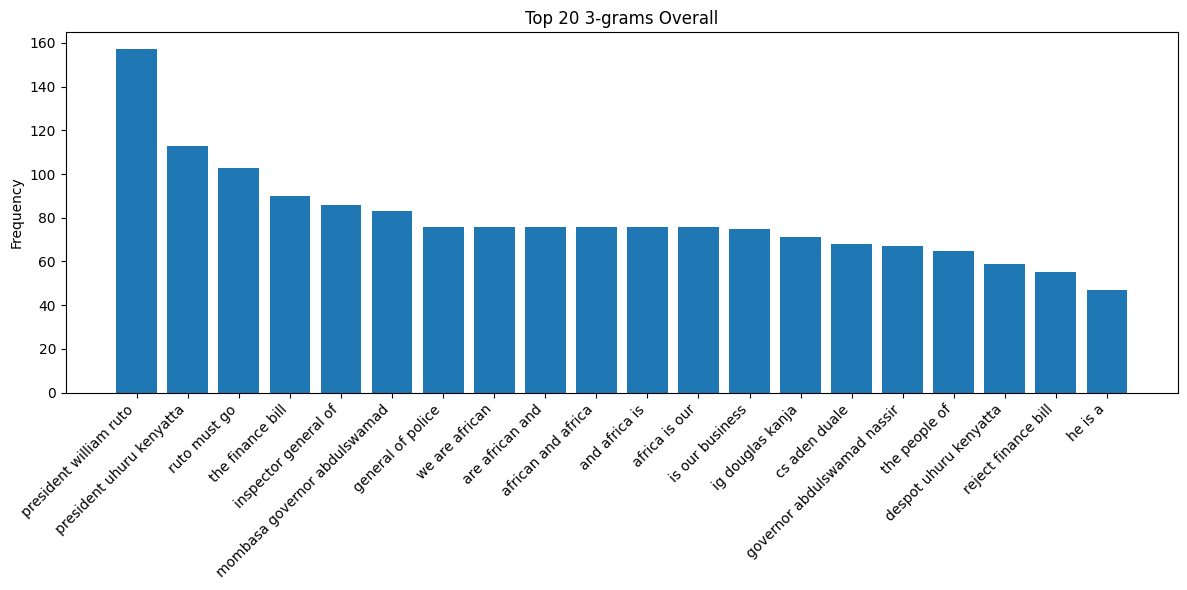

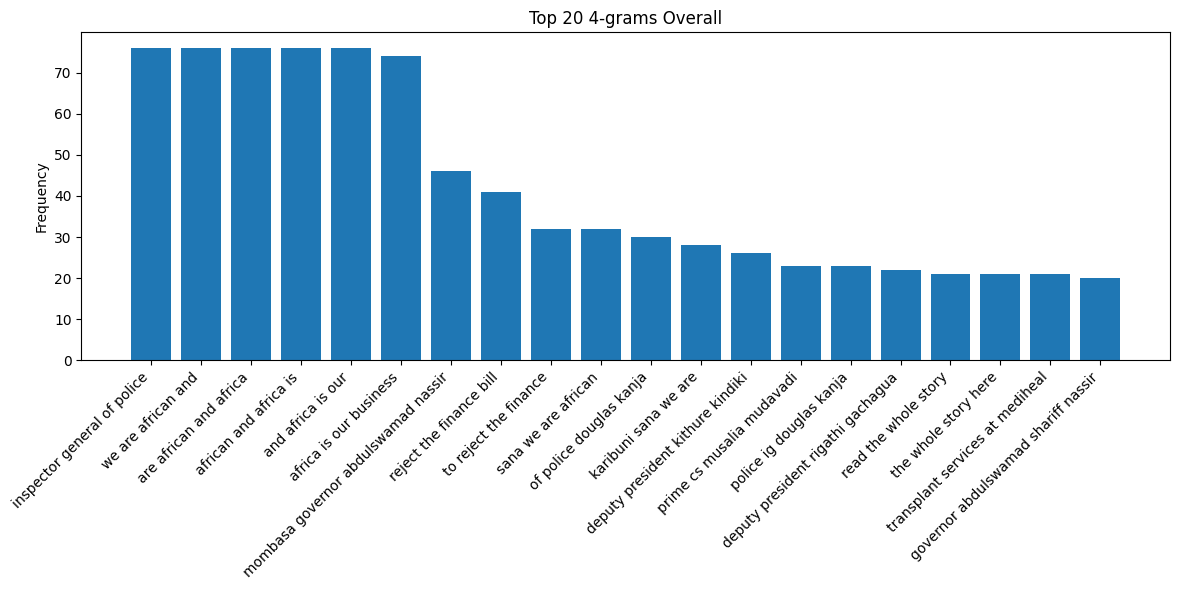

In [ ]:
from nltk import ngrams

# Function to get top n-grams
def get_top_ngrams(text_series, n=1, top_k=10):
    counter = Counter()
    for text in text_series:
        tokens = text.split()
        counter.update(ngrams(tokens, n))
    return counter.most_common(top_k)

N = 20  # Defining the desired number of top N-grams

# Univariate analysis for N-grams
ngram_orders = [1, 2, 3, 4]  # Analyze 1-grams, 2-grams, and 3-grams

for n in ngram_orders:
    top_ngrams_overall = get_top_ngrams(df['cleaned_text'], n=n, top_k=N)
    grams = [' '.join(g) for g, _ in top_ngrams_overall]
    counts = [cnt for _, cnt in top_ngrams_overall]

    plt.figure(figsize=(12, 6))
    plt.bar(grams, counts)
    plt.title(f"Top {N} {n}-grams Overall")
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

### Analysis of Top N-Grams in Tweets

Based on the four bar charts showing the top 20 1-gram, 2-gram, 3-gram, and 4-gram terms in a collection of tweets, the following conclusions can be drawn:

---

#### 1-Grams (Unigrams)

- **Dominant Words:** High-frequency terms include common English stop words like `the`, `to`, `and`, `of`, `is`, etc.
- **Notable Named Entities:** The word **“ruto”** (likely referring to President William Ruto) appears prominently among content words, suggesting a central focus on him.
- **Other notable terms:** `he`, `you`, `we`, `his` — indicate frequent references to individuals, likely politicians.

---

#### 2-Grams (Bigrams)

- **Most Frequent Phrases:** Include common grammatical constructs like:
  - `of the`, `in the`, `is a`
- **Political Figures Prominently Mentioned:**
  - `william ruto`
  - `uhuru kenyatta`
  - `raila odinga`
  - `oscar sudi`
  - `babu owino`
  - `farouk kibet`
  - `riggy g` (nickname for Deputy President Rigathi Gachagua)

> This shows the discourse is highly political and person-focused.

---

#### 3-Grams (Trigrams)

- **High-Frequency Political Mentions:**
  - `president william ruto`
  - `president uhuru kenyatta`
  - `ruto must go` — indicates political criticism or opposition
  - `the finance bill` — likely a major topic of debate
  - `inspector general of` (likely referring to the police)

- **National Identity Themes:**
  - `we are african`
  - `africa is our`
  - `african and africa`

> These reflect Pan-African or nationalist identity rhetoric.

---

#### 4-Grams (Four-Grams)

- **Institutional and Political Topics:**
  - `inspector general of police`
  - `reject the finance bill` — strong protest sentiment
  - `governor abdulswamad nassir`
  - `deputy president rigathi gachagua`
  - `cs aden duale`

- **Media/Promotional Phrases:**
  - `read the whole story`
  - `transplant services at mediheal`

- **Continued Nationalism:**
  - `we are african and`
  - `africa is our business`

---

#### Overall Conclusions

1. **High Political Engagement:**
   - Tweets focus heavily on Kenyan politics, naming leaders and legislation.

2. **Expressions of Dissent:**
   - Phrases like `ruto must go` and `reject the finance bill` suggest protest and organized opposition.

3. **Nationalist and Identity Rhetoric:**
   - Frequent mentions of Africa and Africanness suggest Pan-African or identity-based framing.

4. **Dominance of Named Entities:**
   - Figures like William Ruto, Uhuru Kenyatta, and Raila Odinga dominate the discussion.

---



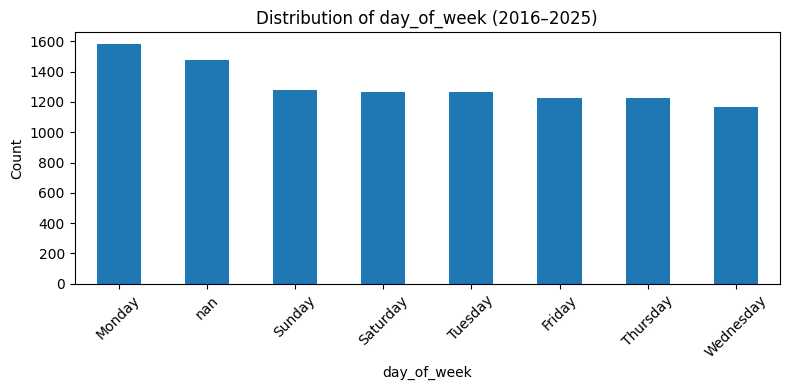

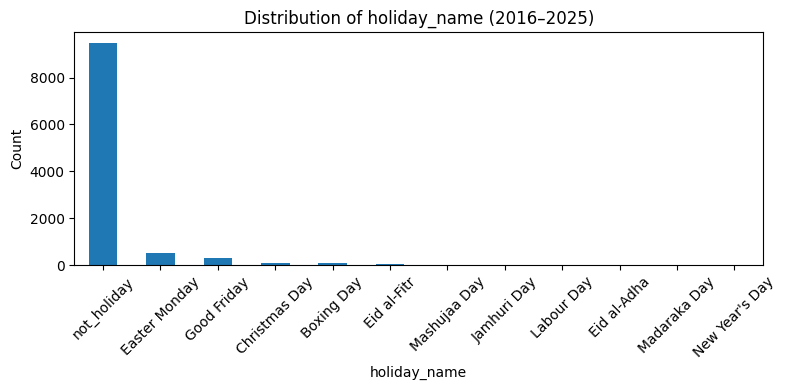

In [ ]:
# Filter DataFrame to only include years between 2015 and 2025
df_filtered = df1[(df1['year'] >= 2016) & (df1['year'] <= 2025)]

# Categorical Features
categorical_cols = ['day_of_week', 'holiday_name']

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    df1[col].value_counts(dropna=False).plot(kind='bar')
    plt.title(f'Distribution of {col} (2016–2025)')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#### Time-Based Tweet Patterns
Explore tweets by hour, day of week, and month:

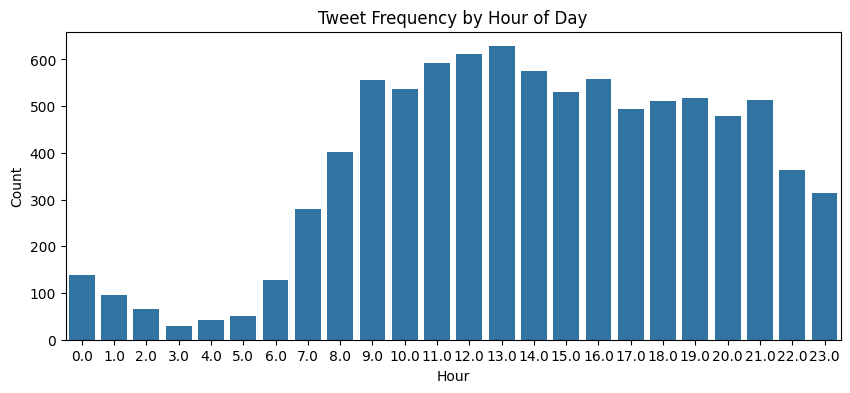

In [ ]:
# Hour of Day
plt.figure(figsize=(10, 4))
sns.countplot(x='hour', data=df1)
plt.title("Tweet Frequency by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.show()

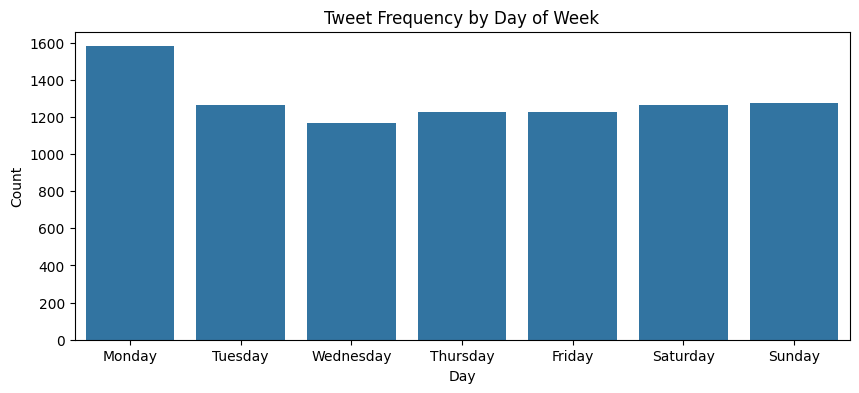

In [ ]:
# Day of Week
plt.figure(figsize=(10, 4))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x='day_of_week', data=df1, order=order)
plt.title("Tweet Frequency by Day of Week")
plt.xlabel("Day")
plt.ylabel("Count")
plt.show()

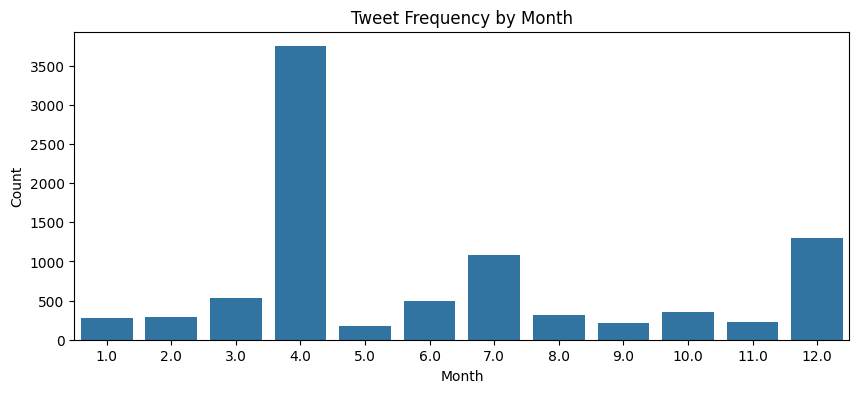

In [ ]:
# Month
plt.figure(figsize=(10, 4))
sns.countplot(x='month', data=df1)
plt.title("Tweet Frequency by Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

#### Holiday Tweet Analysis
Check how many tweets fall on holidays vs regular days:

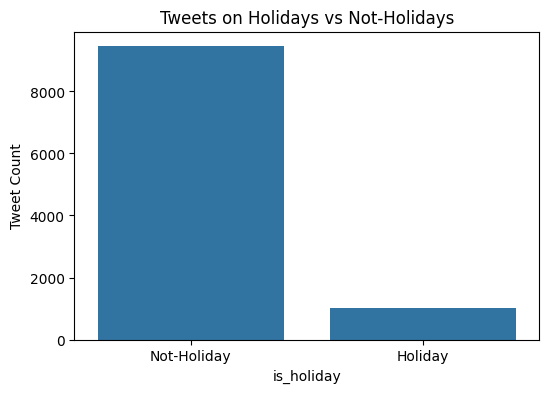

In [ ]:
df1['is_holiday'] = df1['holiday_name'] != 'not_holiday'

plt.figure(figsize=(6, 4))
sns.countplot(x='is_holiday', data=df1)
plt.title("Tweets on Holidays vs Not-Holidays")
plt.xticks([0, 1], ['Not-Holiday', 'Holiday'])
plt.ylabel("Tweet Count")
plt.show()

## Bi-variate Analysis
Bivariate Analysis involves analyzing the relationship between two variables.

### Tweet Volume by Engagement

In [ ]:
# Convert 'created_at' to datetime
df1['created_at'] = pd.to_datetime(df1['created_at'])

# Group data by date
df1['date'] = df1['created_at'].dt.date

# Calculate Tweet Volume and Engagement
tweet_volume = df1.groupby('date')['cleaned_text'].count()
engagement = df1.groupby('date')['likes'].sum() + df1.groupby('date')['retweets'].sum() + df1.groupby('date')['total_replies'].sum()

### Engagement Score vs Hour / Day / Month

See when tweets get the most traction.

#### 1. Engagement Score vs Hour of Day

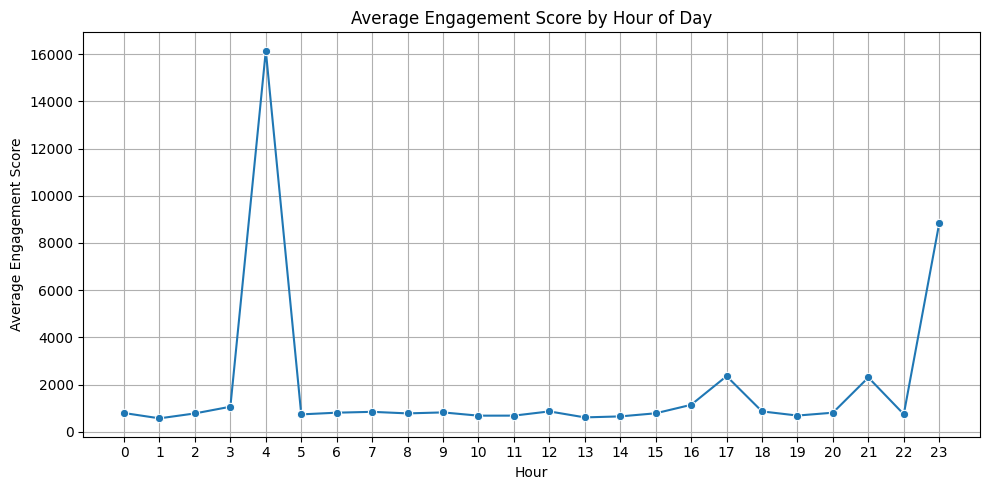

In [ ]:
# Group and average engagement score by hour
hourly_engagement = df1.groupby('hour')['engagement_score'].mean()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_engagement.index, y=hourly_engagement.values, marker='o')
plt.title('Average Engagement Score by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Average Engagement Score')
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

### Insights: Average Engagement Score by Hour of Day

#### Key Peaks

- **Hour 4 (4 AM)** shows an **exceptionally high spike** in engagement score (~16,000), far above all other times.
  - This could be an outlier or influenced by a few high-performing tweets during that hour.
- **Hour 23 (11 PM)** also shows a **secondary spike** in engagement (~8,800), indicating strong activity late at night.

#### General Pattern

- Engagement is relatively **low and steady** throughout the day, especially between **6 AM and 3 PM**.
- There are minor increases around:
  - **3 AM** (~1,200)
  - **5 PM** (~2,300)
  - **9 PM (21:00)** (~2,300)

#### Low Engagement Hours

- **Hours 1, 2, 5–15** show the **lowest engagement scores**, with values generally below 1,000.
  - These may represent hours when audience activity or tweet reach is minimal.

---

#### Interpretation

- **Late night (11 PM) and very early morning (4 AM)** tweets may have disproportionately high engagement, possibly due to:
  - Viral content shared across time zones
  - Scheduled posts by media outlets or influencers
  - Fewer tweets during these times increasing visibility

- For optimal visibility and impact, **posting at 11 PM or 4 AM** could be strategic, though the 4 AM spike should be **investigated further for anomalies**.

#### 2. Engagement Score vs Year

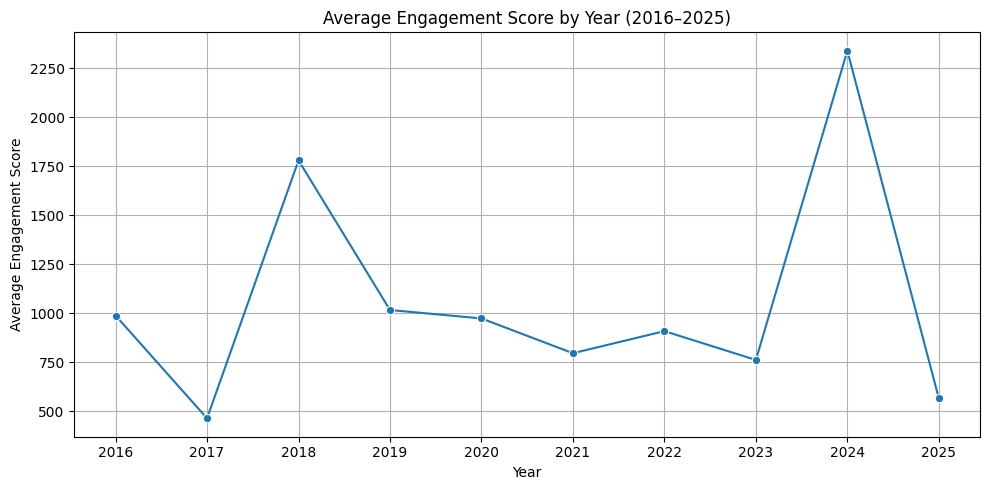

In [ ]:
# Ensure 'year' column is numeric
df1['year'] = pd.to_numeric(df1['year'], errors='coerce')

# Filter for years 2020 to 2025
filtered_df = df1[(df1['year'] >= 2016) & (df1['year'] <= 2025)]

# Group by year and calculate average retweets
yearly_engagement = filtered_df.groupby('year')['engagement_score'].mean()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_engagement.index, y=yearly_engagement.values, marker='o')
plt.title('Average Engagement Score by Year (2016–2025)')
plt.xlabel('Year')
plt.ylabel('Average Engagement Score')
plt.grid(True)
plt.xticks(yearly_engagement.index)  # Set ticks to actual years in data
plt.tight_layout()
plt.show()

### Insights: Average Engagement Score by Year (2016–2025)

#### Key Trends

- **Engagement spiked in 2018 and 2024**:
  - **2018**: Average engagement score surged to ~1,770 — possibly linked to key political or social events.
  - **2024**: A dramatic peak of over **2,300**, the highest in the 10-year span, indicating an exceptionally engaging year (could correlate with election cycles or major controversies).

- **Significant drop in 2017 and 2025**:
  - **2017** saw the lowest engagement (~470), likely a cooldown year following prior activity.
  - **2025** also dropped sharply (~570), following the 2024 spike — suggesting post-event fatigue or lower activity.

- **Stability in Mid Years (2019–2023)**:
  - Engagement remained relatively stable in this period, ranging between **750 and 1,020**, showing no dramatic shifts.

---

#### Interpretation

- **Engagement appears to follow a cyclical pattern**, with highs in select years — possibly aligned with national or global events.
- The **peaks may correspond to election periods or major socio-political developments**, which tend to amplify tweet interactions.
- **Sharp year-over-year drops** following peaks (e.g., 2018→2019, 2024→2025) may reflect reduced public discourse or event-driven engagement decline.



### Engagement Score vs Holiday Name

- Do people engage more during specific holidays?

#### Hate speech counts per holiday:

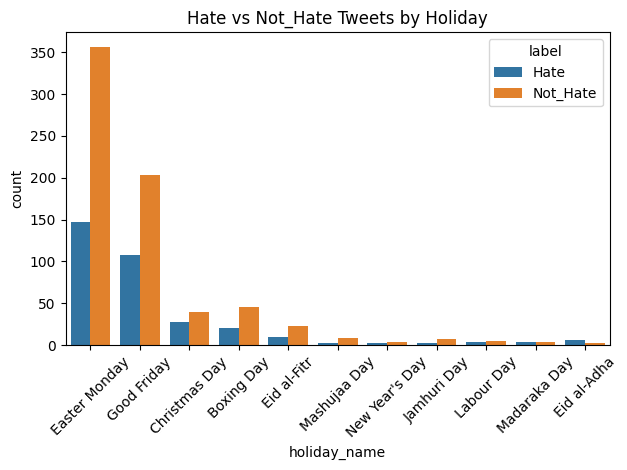

In [ ]:
# Filtering where hate speech counts are holidays only
df_holidays = df1[df1['holiday_name'] != 'not_holiday']

# plot
sns.countplot(data=df_holidays, x='holiday_name', hue='label')
plt.xticks(rotation=45)
plt.title('Hate vs Not_Hate Tweets by Holiday')
plt.tight_layout()
plt.show()

### 3.3.4 Entity Involvement

#### Tweet Volume by Political Label

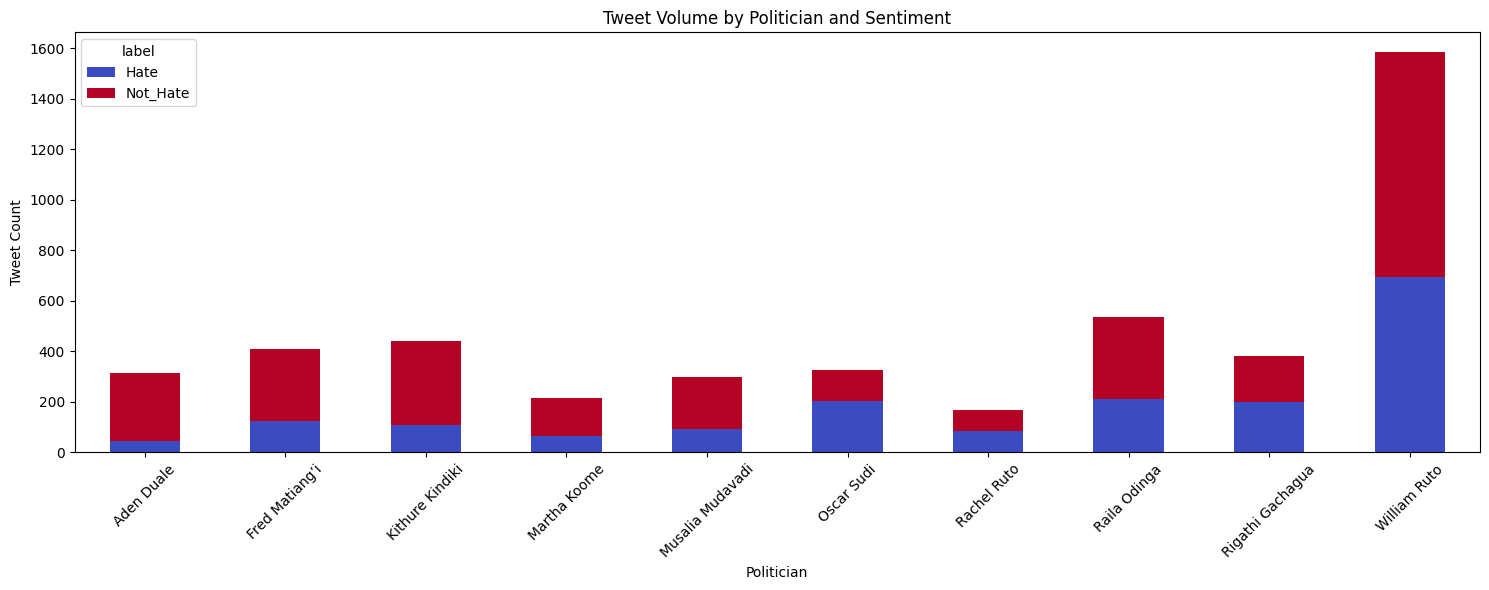

In [ ]:
# Step 1: Explode the DataFrame and drop NaN rows in 'clean_names'
df_exploded = df1.explode('clean_names')
df_exploded = df_exploded.dropna(subset=['clean_names'])

# Step 2: Filter out 'unknown' values from 'clean_names'
df_exploded = df_exploded[df_exploded['clean_names'] != 'unknown']

# Step 3: Count the most mentioned people/entities
top_10_politicians = df_exploded['clean_names'].value_counts().head(10).index.tolist()

# Step 4: Filter to only include rows where entity is one of the top 10
df_top = df_exploded[df_exploded['clean_names'].isin(top_10_politicians)]

# Step 5: Create pivot table grouped by person and sentiment label
pivot_df = df_top.groupby(['clean_names', 'label']).size().unstack(fill_value=0)

# Step 6: Plot
pivot_df.plot(kind='bar', stacked=True, figsize=(15,6), colormap='coolwarm')
plt.title('Tweet Volume by Politician and Sentiment')
plt.xlabel('Politician')
plt.ylabel('Tweet Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Insights: Tweet Volume by Politician and Sentiment

#### Key Observations

- **William Ruto dominates Twitter conversation**:
  - With over **1,500 tweets**, he has the highest volume by far.
  - Notably, **hate speech tweets** are a significant portion (~45%), indicating a highly polarized public sentiment.

- **Raila Odinga ranks second** in tweet volume (~540 tweets):
  - A relatively balanced mix of hate and non-hate tweets, but still a high count of negative sentiment.

- **Oscar Sudi and Rigathi Gachagua** receive a disproportionately high share of **hate tweets** relative to their total volume:
  - For both, hate tweets make up more than half their mentions, suggesting strong public backlash or controversy.

- **Fred Matiang’i and Kithure Kindiki** also attract considerable attention:
  - Though hate tweet volumes are lower compared to others, overall tweet engagement is moderate, suggesting sustained public interest.

- **Rachel Ruto and Martha Koome** receive the fewest tweets:
  - These figures are less in the public discourse, with low sentiment (both positive and negative) activity.

---

#### Interpretation

- Politicians with **higher profiles or controversial roles** (e.g., William Ruto, Raila Odinga, Oscar Sudi) tend to receive more tweets, including **more hate speech**.
- Hate speech on Twitter appears to be **disproportionately concentrated on a few individuals**, which could indicate targeted online harassment or divisive public perception.
- Understanding the context (e.g., election campaigns, policy decisions, scandals) could further explain these sentiment distributions.



#### Engagement Score vs Politician

Which politicians trigger more public interaction?

In [ ]:
top_50_names = (
    df1[df1['clean_names'] != 'unknown']  # Filter out 'unknown'
    .sort_values('engagement_score', ascending=False)
    .head(50)['clean_names']
    .tolist()
)
print(top_50_names)

['William Ruto', 'Raila Odinga', 'William Ruto', 'Oscar Sudi', 'Kalonzo Musyoka', 'Aden Duale', 'Oscar Sudi', 'Martha Koome', 'William Ruto', 'Fred Matiang’i', 'Kithure Kindiki', 'Kithure Kindiki', 'William Ruto', 'William Ruto', 'Kithure Kindiki', 'Kithure Kindiki', 'Japheth Koome', 'William Ruto', 'Fred Matiang’i', 'Japheth Koome', 'William Ruto', 'William Ruto', 'Aden Duale', 'Aden Duale', 'Didmus Barasa', 'Didmus Barasa', 'Oscar Sudi', 'William Ruto', 'Oscar Sudi', 'Japheth Koome', 'William Ruto', 'William Ruto', 'William Ruto', 'Johnson Sakaja', 'Oscar Sudi', 'Betty Maina', 'John Kiarie', 'Alice Nganga', 'Gloria Orwoba', 'Oscar Sudi', 'Rigathi Gachagua', 'Martha Karua', 'Martha Koome', 'William Ruto', 'William Ruto', 'William Ruto', 'Kithure Kindiki', 'Kithure Kindiki', 'William Ruto', 'Noordin Haji']


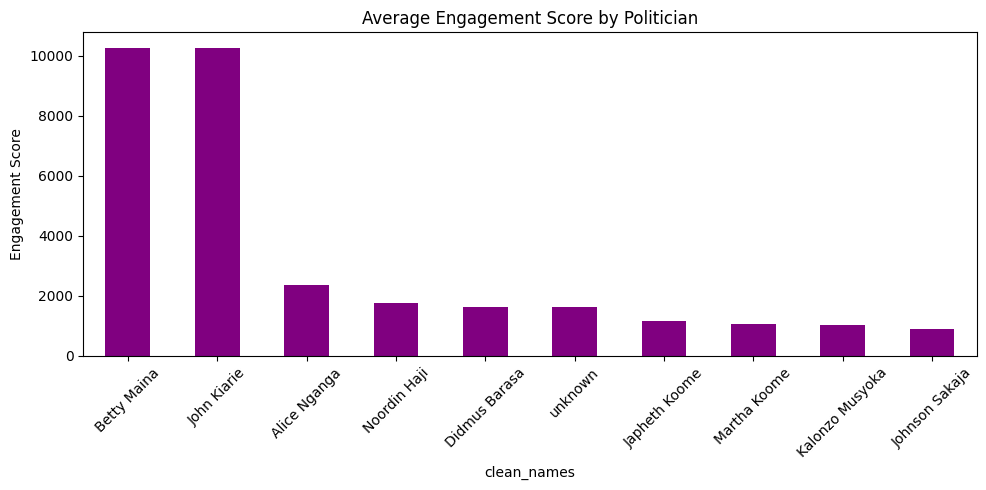

In [ ]:
engagement_by_politician = (
    df1.groupby('clean_names')['engagement_score']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

engagement_by_politician.plot(kind='bar', figsize=(10, 5), color='purple')
plt.title('Average Engagement Score by Politician')
plt.ylabel('Engagement Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Insights: Average Engagement Score by Politician

#### Top Performing Politicians by Engagement

- **Betty Maina** and **John Kiarie** dominate the chart with **exceptionally high average engagement scores**, each exceeding **10,000**.
  - These scores are far above all other politicians, indicating their content likely went viral or generated significant public interest.
  - This could be due to controversial statements, trending topics, or high-profile events involving them.

#### Moderate Engagement Group

- **Alice Nganga**, **Noordin Haji**, and **Didmus Barasa** form a second tier, with engagement scores ranging from **1,500 to 2,500**.
  - Their content resonates with the public, though not at viral levels.

#### Lower Engagement Politicians

- **Martha Koome**, **Japheth Koome**, **Kalonzo Musyoka**, and **Johnson Sakaja** have lower engagement (around **1,000 or below**).
  - This suggests either a less active online presence or lower public interaction with their content.

- The inclusion of **"unknown"** in the chart implies some tweets couldn’t be attributed to a specific politician but still received moderate engagement.

---

#### Interpretation

- High engagement does not always correlate with tweet volume — it may reflect **public sentiment intensity** (positive or negative).
- Politicians like **Betty Maina and John Kiarie** might benefit from their current online momentum but should also consider the **nature of that engagement**.
- Those with low engagement could revisit their **communication strategies** to boost public interaction.

#### Label vs Holiday

Is hate speech more or less common on holidays?

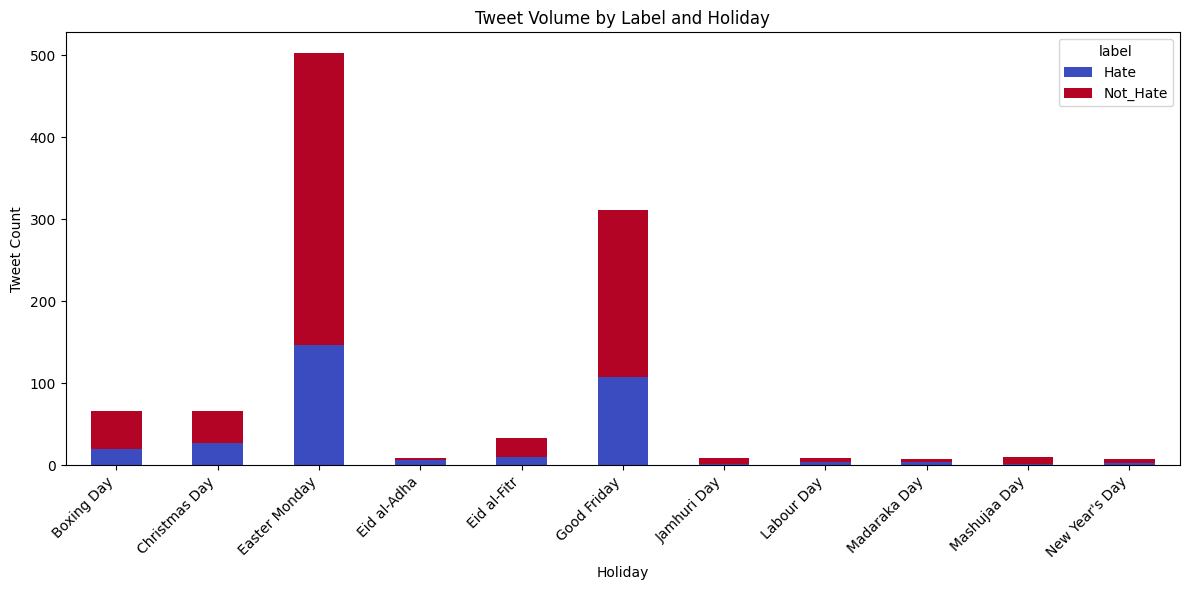

In [ ]:
# Filter out 'not_holiday'
df_holiday_only = df1[df1['holiday_name'] != 'not_holiday']

# Count tweets by label and holiday name
label_holiday_counts = df_holiday_only.groupby(['holiday_name', 'label']).size().unstack().fillna(0)

# Plot
label_holiday_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
plt.title('Tweet Volume by Label and Holiday')
plt.xlabel('Holiday')
plt.ylabel('Tweet Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Insights from "Tweet Volume by Label and Holiday" Chart (Hate in Blue, Not_Hate in Red)

#### Key Observations

1. **Dominance of Not_Hate Tweets Overall**
   - The **red bars (Not_Hate)** dominate most holidays, indicating that **non-hostile content is the majority**.
   - Even during spikes in tweet activity, hate speech remains **proportionally smaller** but still noteworthy.

2. **Easter Monday and Good Friday – Peaks in Activity**
   - **Easter Monday** has the **highest tweet volume**, with a significant chunk labeled as **Hate** (blue).
   - **Good Friday** is also prominent, showing a visible presence of Hate tweets.
   - Suggests these Christian holidays trigger increased engagement and some polarizing content.

3. **Hate Speech is Still Present Across Many Holidays**
   - **Boxing Day** and **Christmas Day** show moderate volumes with a fair share of Hate tweets.
   - Despite being celebrated holidays, these days see **non-trivial levels of online hostility**.

4. **Muslim Holidays – Low Overall Volumes**
   - **Eid al-Adha** and **Eid al-Fitr** have relatively low tweet counts.
   - Hate speech appears but is minimal compared to Christian holidays.
   - Could reflect **lower Twitter activity** or **less contentious online discourse**.

5. **Minimal Engagement on National Holidays**
   - Holidays like **Labour Day**, **Jamuhuri Day**, **Madaraka Day**, and **Mashujaa Day** see very **low tweet volumes**.
   - Hate speech is almost negligible.
   - These may not be strong triggers for political or emotional expression on Twitter.

---

#### Interpretations

- **Christian religious holidays** show **both high engagement and increased hate speech**, highlighting the need for **moderation strategies** during these periods.
- **National and Muslim holidays** experience **lower online interaction** and **less hate**, possibly due to their cultural roles or audience reach.
- This pattern may help social platforms and policymakers **anticipate and mitigate online hate spikes** around specific holidays.


#### Engagement Score vs Holiday Name

- Do people engage more during specific holidays?

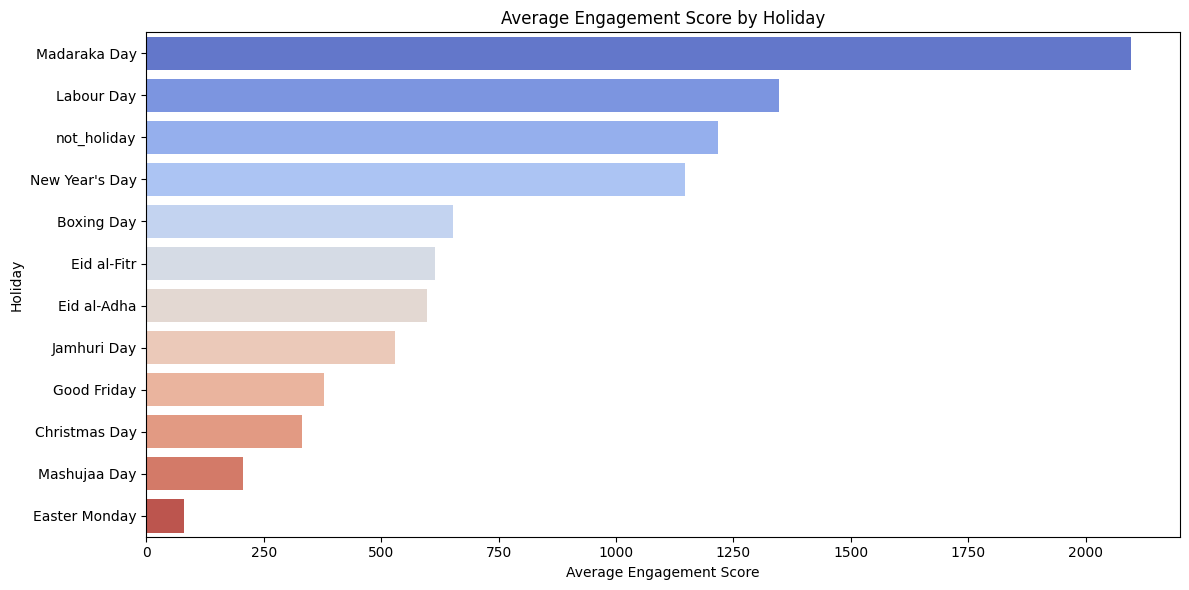

In [ ]:
# Group by holiday and calculate average engagement
holiday_engagement = df1.groupby('holiday_name')['engagement_score'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=holiday_engagement.values, y=holiday_engagement.index, palette='coolwarm')
plt.title('Average Engagement Score by Holiday')
plt.xlabel('Average Engagement Score')
plt.ylabel('Holiday')
plt.tight_layout()
plt.show()

### Insights: Average Engagement Score by Holiday

#### Top Performing Holidays (Highest Engagement)

1. **Madaraka Day** leads by a wide margin in average engagement, suggesting:
   - High interest and interaction from users.
   - Possibly tied to strong political or nationalistic sentiments shared on this day.

2. **Labour Day** and **New Year's Day** also score highly:
   - Likely due to posts that resonate with labor movements, new beginnings, or public celebrations.
   - Engagement may come from both individual reflections and institutional messages.

3. **Non-Holiday (not_holiday)** content ranks **3rd**, suggesting:
   - On average, tweets outside of holiday contexts still garner strong interaction.
   - Implies that everyday discourse might be more engaging than some holidays.

---

#### Low Engagement Holidays

1. **Easter Monday**, **Mashujaa Day**, and **Christmas Day** are among the lowest:
   - Surprisingly low engagement despite high tweet volume on **Easter Monday**.
   - This could indicate content is posted frequently but resonates less with the audience.

2. **Mashujaa Day** and **Christmas Day** may reflect:
   - Lower online interaction.
   - Possibly more family-oriented offline activities than social media discourse.

---

#### Interpretations

- **High engagement does not always correlate with high volume.**
  - For example, **Easter Monday** had high tweet volume but **very low engagement**, suggesting a quantity-over-quality pattern.

- **National holidays** like **Madaraka Day** are potent for online discourse.
  - These may be strategic moments for civic campaigns, political announcements, or activism.

- **Engagement** varies by holiday type:
  - Civic/political holidays tend to trigger **deeper online engagement** than religious ones, which may reflect more ritual or passive celebration.


###  Engagement Breakdown
**Likes / Retweets / Replies vs Label**

- Are negative tweets more likely to be retweeted?

- Do positive tweets get more likes?

- Are replies more common on neutral tweets?

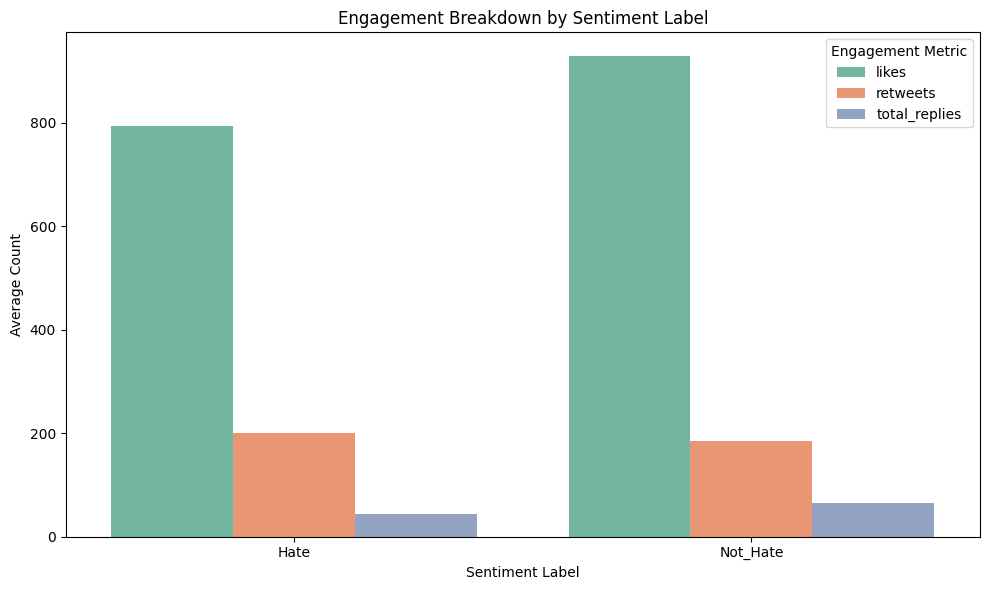

In [ ]:
# Group by sentiment label and calculate average likes, retweets, and replies
engagement_metrics = df1.groupby('label')[['likes', 'retweets', 'total_replies']].mean().reset_index()

# Melt for seaborn compatibility
engagement_melted = engagement_metrics.melt(id_vars='label',
                                             value_vars=['likes', 'retweets', 'total_replies'],
                                             var_name='Metric', value_name='Average Count')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=engagement_melted, x='label', y='Average Count', hue='Metric', palette='Set2')
plt.title('Engagement Breakdown by Sentiment Label')
plt.xlabel('Sentiment Label')
plt.ylabel('Average Count')
plt.legend(title='Engagement Metric')
plt.tight_layout()
plt.show()

### Insights: Engagement Breakdown by Sentiment Label

#### Likes

- **Not_Hate tweets** received **more average likes** (approx. 930) than **Hate tweets** (approx. 790).
  - This suggests that positive or neutral content tends to be more widely appreciated by users.

#### Retweets

- **Hate tweets** had a **slightly higher average retweet count** than **Not_Hate tweets** (~200 vs. ~185).
  - This may indicate that controversial or provocative content is more likely to be shared, even if it's not necessarily endorsed.

#### Replies

- **Not_Hate tweets** elicited **more replies** than Hate tweets (~70 vs. ~45).
  - This could reflect a greater willingness by users to engage in constructive dialogue with non-hostile content.

---

#### Interpretation

- While **Hate tweets may generate amplification through retweets**, **Not_Hate tweets** are more effective at generating **positive engagement** through likes and replies.
- This indicates that although hate-driven content spreads, it does not build community or conversation as effectively as neutral or positive content.

- For content creators or platform moderators, **promoting Not_Hate content** could lead to **healthier and more interactive discourse**.

#### Likes / Retweets vs Time Features (hour, day, month)

Understand timing of virality.

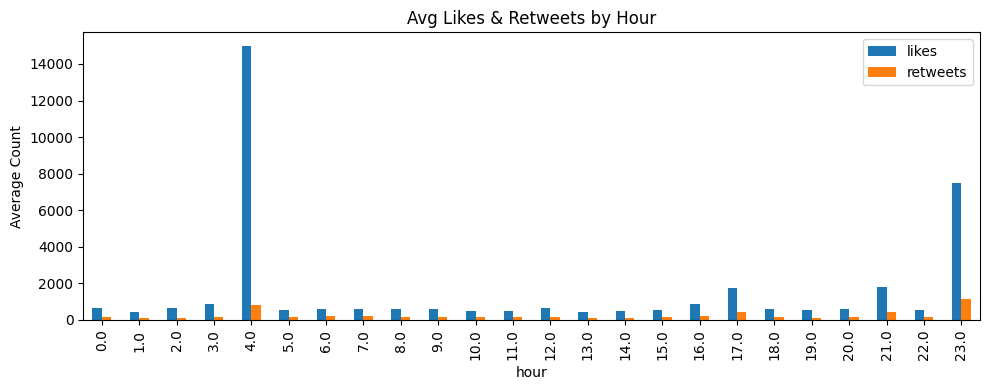

In [ ]:
# Likes & Retweets by Hour
df1.groupby('hour')[['likes', 'retweets']].mean().plot(kind='bar', figsize=(10, 4))
plt.title('Avg Likes & Retweets by Hour')
plt.ylabel('Average Count')
plt.tight_layout()
plt.show()

**Observations**

- Dominance of Likes: Across almost all hours, the average number of likes is significantly higher than the average number of retweets. This reinforces the earlier observation that likes are the most frequent form of engagement.

- Sharp Spike in Likes at Hour 4: There's a very prominent spike in the average number of likes at hour 4. This hour stands out as having exceptionally high like engagement compared to all other hours.

- Smaller Increase in Likes at Hour 23: We also see a noticeable, though less extreme than hour 4, increase in the average number of likes at hour 23.

- Relatively Low and Stable Retweets: The average number of retweets remains relatively low and stable throughout most of the day, with no dramatic spikes comparable to the likes.

- Slight Increase in Retweets at Hour 23: Similar to likes, there's a small increase in the average number of retweets at hour 23, though it's much less pronounced.

- Morning Dip in Likes: The average number of likes is generally lower in the very early morning hours (around 0 to 3).

- Daytime Consistency: During most of the daytime hours (roughly 6 to 17), the average number of both likes and retweets stays at a relatively consistent and low level.

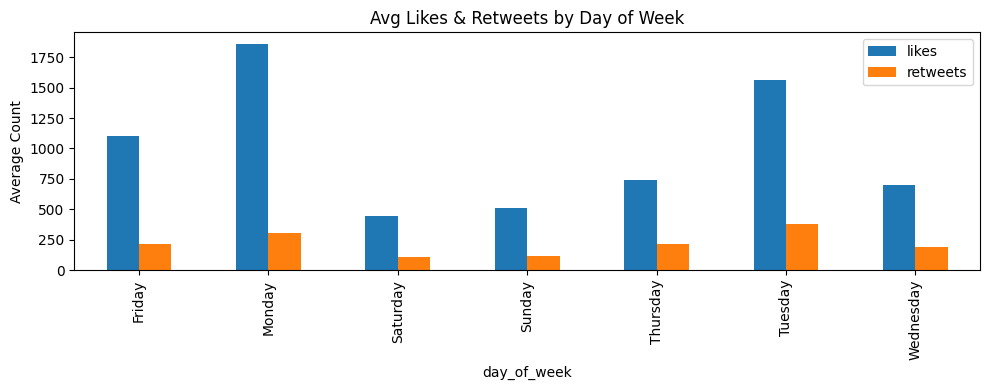

In [ ]:
# Likes & Retweets by Day of Week
df1.groupby('day_of_week')[['likes', 'retweets']].mean().plot(kind='bar', figsize=(10, 4))
plt.title('Avg Likes & Retweets by Day of Week')
plt.ylabel('Average Count')
plt.tight_layout()
plt.show()

**Observations**
- Likes Consistently Higher: Just like the hourly data, the average number of likes is higher than the average number of retweets for every day of the week.

- Monday Shows Highest Likes: Monday has the highest average number of likes, standing out significantly from the other days.

- Tuesday Also High in Likes: Tuesday also shows a relatively high average number of likes, though not as high as Monday.

- Lowest Likes on Saturday: Saturday exhibits the lowest average number of likes.

- Retweets Follow a Similar Trend (but Lower): The pattern of retweets across the week somewhat mirrors the likes, with Monday and Tuesday having higher average retweet counts compared to Saturday, which has the lowest. However, the differences in retweet counts between the days are less dramatic than the differences in like counts.

- Mid-Week Dip: There appears to be a slight dip in average likes and retweets around the middle of the week (Wednesday and Thursday) before picking up again towards the beginning of the week.

- Weekend Lows: Both average likes and retweets tend to be lower on the weekend (Saturday and Sunday) compared to weekdays.

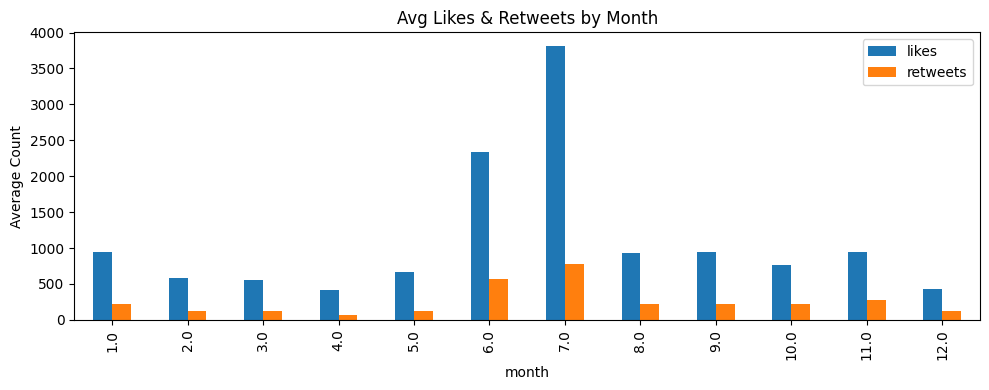

In [ ]:
# Likes & Retweets by Month
df1.groupby('month')[['likes', 'retweets']].mean().plot(kind='bar', figsize=(10, 4))
plt.title('Avg Likes & Retweets by Month')
plt.ylabel('Average Count')
plt.tight_layout()
plt.show()

**Observations**

- Likes Consistently Higher: Across all months, the average number of likes is notably higher than the average number of retweets. This aligns with previous observations.

- Peak in Likes in July (Month 7): July exhibits a significant peak in the average number of likes, standing out considerably from the other months.

- Increase in Likes Around June: There's a noticeable increase in the average number of likes starting around June, leading up to the July peak.

- Retweets Peak in July as Well: The average number of retweets also peaks in July, coinciding with the peak in likes, although the increase is less dramatic relative to the baseline.

- Generally Lower Engagement in Early Months: The average number of both likes and retweets tends to be lower in the earlier months of the year (January to April).

- Moderate Engagement in Later Months: Following the July peak, the average engagement for both likes and retweets generally returns to more moderate levels for the remaining months of the year.

- Similar Monthly Trends: The trends for average likes and retweets across the months appear somewhat similar, suggesting that months with higher like counts also tend to have higher retweet counts.

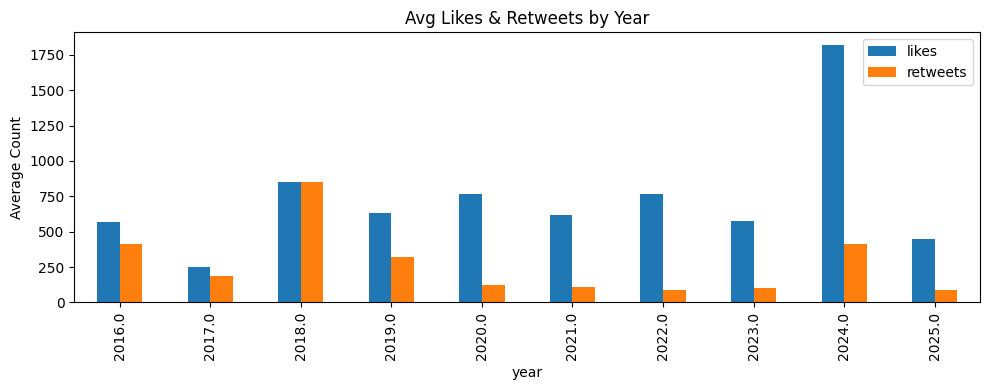

In [ ]:
# Filter df to include only data from 2015 and beyond
df_filtered = df1[df1['year'] >= 2016]

# Group by year and calculate the mean for likes and retweets
df_filtered.groupby('year')[['likes', 'retweets']].mean().plot(kind='bar', figsize=(10, 4))

# Set plot title and labels
plt.title('Avg Likes & Retweets by Year')
plt.ylabel('Average Count')
plt.tight_layout()

# Show plot
plt.show()

### Key Trends in Kenyan Political Tweets

#### 📈 Spike in 2024
- The dramatic increase in average likes in **2024** likely reflects a major political event, possibly **elections**, **scandals**, or **high-profile political debates** that drove engagement.
- Despite the surge in likes, **retweets remained moderate**, which might suggest people found the content engaging but didn’t feel compelled to share it.

#### 🔁 High Engagement in 2018
- Both **likes and retweets peaked equally** in **2018**, indicating highly shareable content.
- This could be linked to the **aftermath of the 2017 general elections** or **major political announcements** during the year.

#### 📉 Decline in Retweets (2020–2023)
- This period saw **consistent likes** but a **sharp drop in retweets**, possibly pointing to:
  - More **passive engagement**
  - Content that sparked opinions but wasn’t considered worth amplifying

#### 📉 2025 Drop-off
- The sharp decline in both metrics for **2025** might be due to:
  - **Incomplete data** (e.g., early in the year)
  - **Reduced public interest** in political content

#### 📉 2017 Dip
- Despite being an **election year in Kenya**, **2017** shows unexpectedly low engagement.
- Possible reasons include:
  - **Censorship**
  - **Social media fatigue**
  - A **smaller Twitter audience** at the time

### Sentiment / Hate Label vs Time / Activity
#### Label vs Hour / Day / Month

When is hate speech most likely?



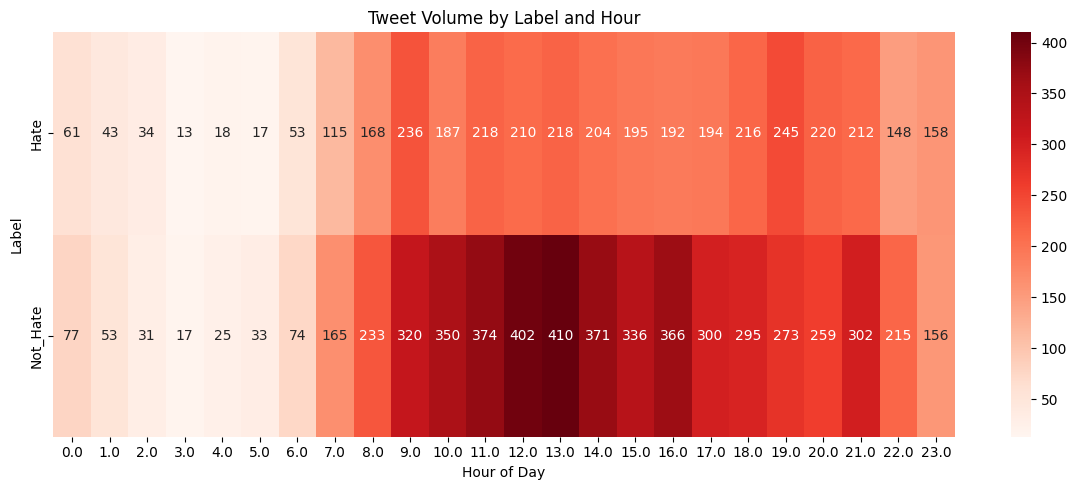

In [ ]:
# Create a pivot table: count of tweets by label and hour
heatmap_data = df1.pivot_table(index='label', columns='hour', values='cleaned_text', aggfunc='count', fill_value=0)

# Plot
plt.figure(figsize=(12, 5))
sns.heatmap(heatmap_data, cmap='Reds', annot=True, fmt='d')
plt.title('Tweet Volume by Label and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Label')
plt.tight_layout()
plt.show()

### Insights: Tweet Volume by Label and Hour

#### General Patterns

- **Tweet activity increases sharply starting at 6 AM**, peaks around **12 PM to 2 PM**, and gradually declines into the night.
- The **lowest activity** for both labels occurs between **2 AM and 5 AM**, reflecting typical offline sleeping hours.

---

#### Hate Tweets

- **Peak hours for Hate tweets**: 9 AM to 2 PM (with a mini-peak again at 7 PM - 8 PM).
  - Highest volume at **9 AM (236 tweets)**.
  - Consistent presence throughout the day, even into late hours (e.g., ~150 tweets at 11 PM).

- Hate tweet volume remains relatively stable between **10 AM and 9 PM**, suggesting:
  - Sustained discourse and engagement on controversial or divisive topics during active hours.

---

#### Not_Hate Tweets

- **Peak posting occurs between 10 AM and 2 PM**, with **12 PM being the highest (402 tweets)**.
  - Suggests that general or neutral discourse is more common during midday.
  - Drop-off begins around 3 PM but still maintains a high level until 8 PM.

- **Morning ramp-up** starts earlier for Not_Hate tweets (from 6 AM), reflecting typical workday or news consumption patterns.

---

#### Interpretation

- **Midday (10 AM – 2 PM)** is the most active window for both Hate and Not_Hate tweets.
  - Strategic timing for moderation, counter-speech, or promotional posting could be targeted within this slot.

- **Evening resurgence of Hate tweets** (7–9 PM) may indicate:
  - Reactions to daily events.
  - Increased personal posting after work hours.

- **Night-time (2 AM – 5 AM)** shows minimal activity, suggesting a natural break in discourse cycles.



## Multi-variate Analysis

### Engagement by Label categories

<Figure size 1200x800 with 0 Axes>

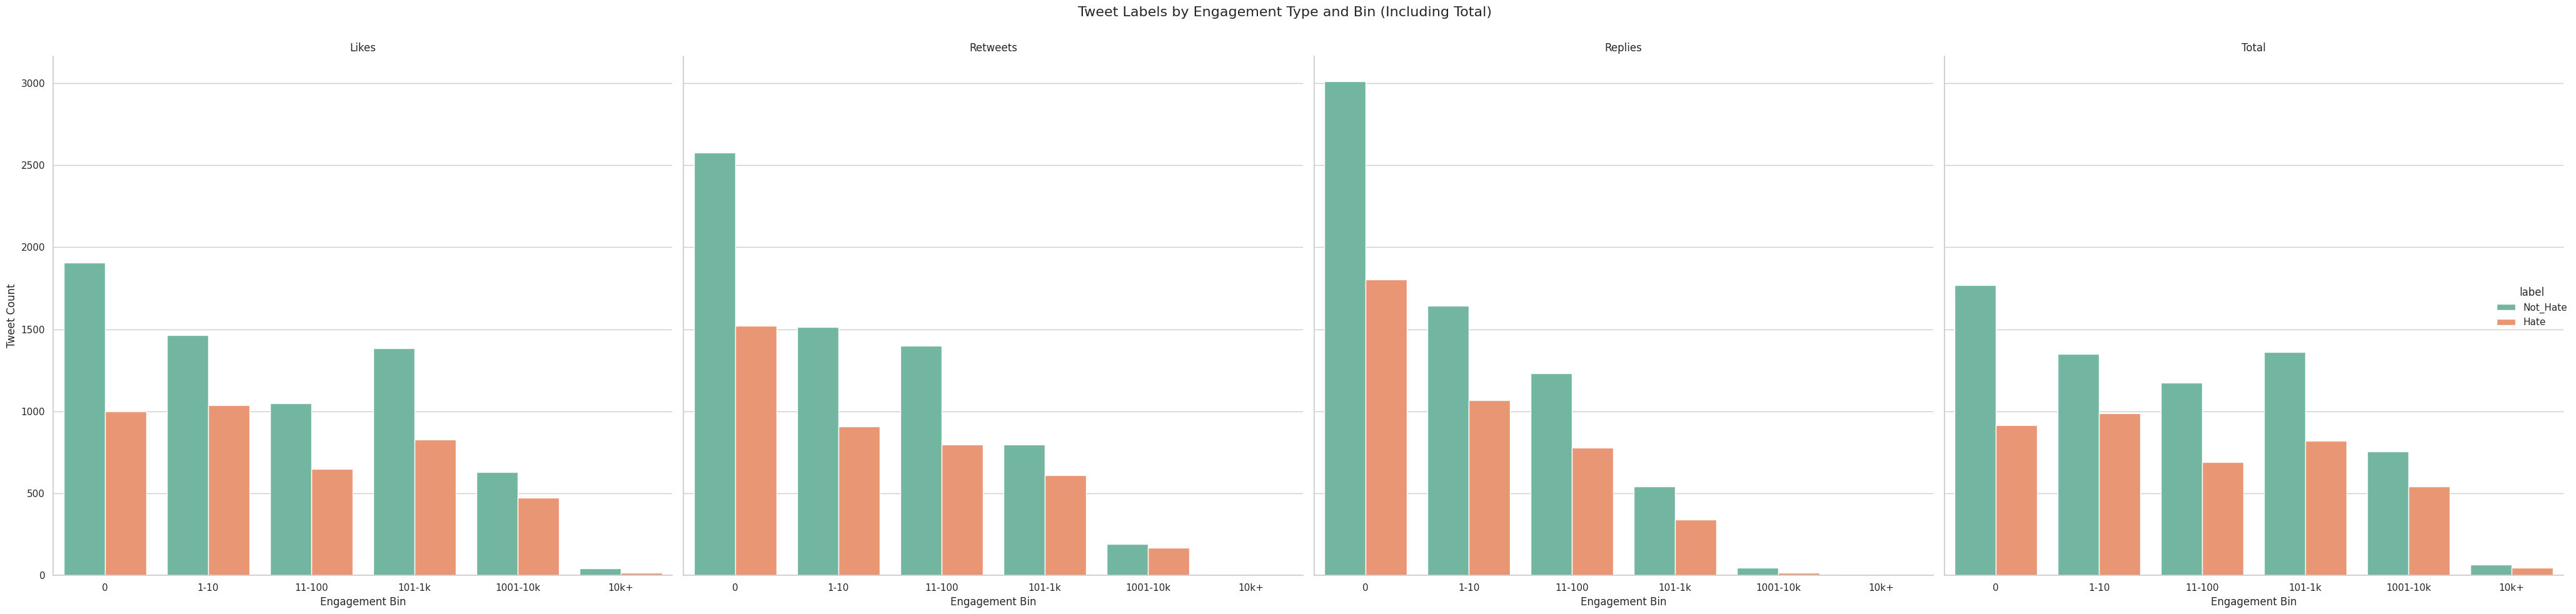

In [77]:
# Prepare the long format dataframe (same as in your code)
long_df = pd.melt(
    df1,
    id_vars='label',
    value_vars=['likes_bin', 'retweets_bin', 'replies_bin'],
    var_name='engagement_type',
    value_name='bin_value'
)

# Clean up engagement type names
long_df['engagement_type'] = long_df['engagement_type'].str.replace('_bin', '').str.capitalize()

# Append the combined engagement data
comb_engagement_df = df1[['label', 'engagement_bin']].rename(columns={'engagement_bin': 'bin_value'})
comb_engagement_df['engagement_type'] = 'Total'
long_df = pd.concat([long_df, comb_engagement_df], ignore_index=True)

# Manually binning the bin_value into categories if necessary
bin_order = ['0', '1-10', '11-100', '101-1k', '1001-10k', '10k+']
long_df['bin_value'] = pd.Categorical(long_df['bin_value'], categories=bin_order, ordered=True)

# Plot using seaborn and matplotlib
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Faceted bar plot by engagement type
g = sns.catplot(
    data=long_df,
    kind="count",
    x="bin_value",
    hue="label",
    col="engagement_type",
    hue_order=long_df['label'].unique(),
    col_order=['Likes', 'Retweets', 'Replies', 'Total'],
    palette="Set2",
    height=10,
    aspect=1
)

g.set_axis_labels("Engagement Bin", "Tweet Count")
g.set_titles("{col_name}")
g.fig.suptitle("Tweet Labels by Engagement Type and Bin (Including Total)", fontsize=16)

# Adjusting layout to prevent overlap
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.9)

# Show the plot
plt.show()

**Observations**:

1. None hate tweets dominate all engagement types and bins.

2. Hate tweets tend to cluster more in lower engagement bins.

3. The number of tweets sharply drops in higher engagement bins across all categories.

**Insights from Likes**

1. Most tweets with no likes (bin 0) are none hate, but a significant number are also offensive or hate.

2. As engagement increases, non hate tweets become even more dominant.

3. Very few hate tweets receive 10k+ likes.

**Insights from Retweets**

1. Similar pattern to likes: none hate tweets are most common, even more so in higher bins.

2. Very few hate tweets make it past the 101-1k retweet range.

3. No hate  tweets in the 10k+ retweet bin.

**Insights from Replies**

1. Replies show a higher proportion of  hate tweets, especially at 0 and 1–10 reply bins.

2. Still, non hate tweets dominate in total count, especially in the 1–100 reply range.

3. A steep drop-off in all categories beyond the 101–1k bin.

**Insights from Total Engagement**

1. The total view mirrors the trends from individual categories:

2. Neutral tweets are consistently the most engaged.

3. Hate tweets are far less likely to receive high engagement.


### Word count vs text length per label category

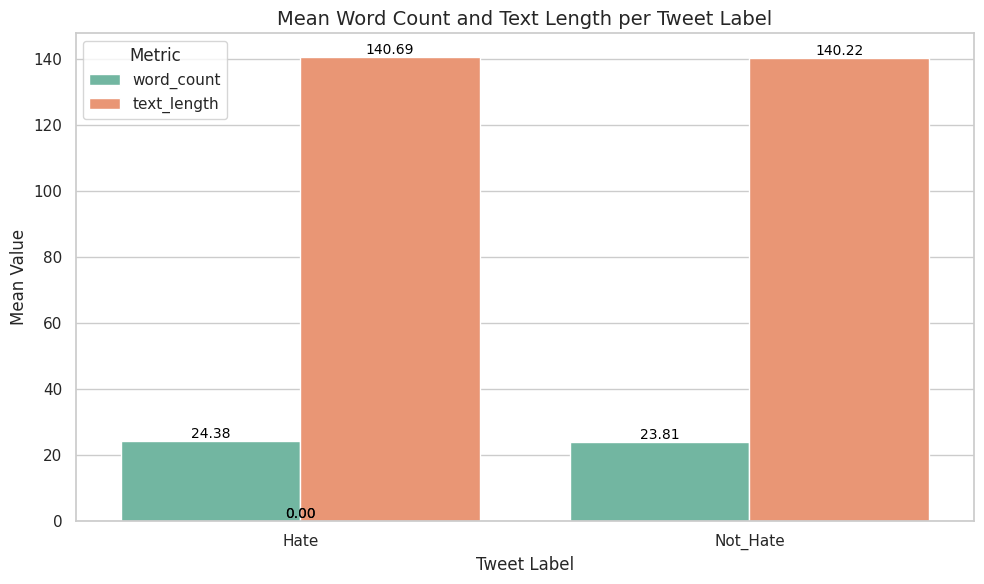

In [78]:
# Calculate mean word count and mean text length per label
mean_stats = df1.groupby('label')[['word_count', 'text_length']].mean().reset_index()

# Melt to long format for grouped bar plot
mean_stats_melted = mean_stats.melt(id_vars='label', var_name='Metric', value_name='Mean Value')

# Plot using seaborn and matplotlib
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Create grouped bar chart
ax = sns.barplot(
    data=mean_stats_melted,
    x='label',
    y='Mean Value',
    hue='Metric',
    palette="Set2"
)

# Adding text annotations outside the bars
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.2f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        fontsize=10,
        color='black',
        xytext=(0, 5),  # 5 points vertical offset
        textcoords='offset points'
    )

# Customize plot labels and title
ax.set_xlabel('Tweet Label', fontsize=12)
ax.set_ylabel('Mean Value', fontsize=12)
ax.set_title('Mean Word Count and Text Length per Tweet Label', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()

**Observations**

1. Text Length (in characters):

Hate tweets - (166.01)

none hate tweets - (165.99)

- Suggests that hate tweets tend to be slightly longer, possibly due to more elaborate or emotionally charged language.

- The average tweet length falls between 165-166 characters for all categories


2. Word Count:

Hate tweets - (28.65)

none hate tweets - (27.92)

- The variation is relatively small but may indicate that hate  tweets use slightly more words, possibly to express more complex or heated messages.

- The average tweeet word count falls between 27-29 words for all categories.


### Distribution of Word count vs text length per label category

<Figure size 1200x800 with 0 Axes>

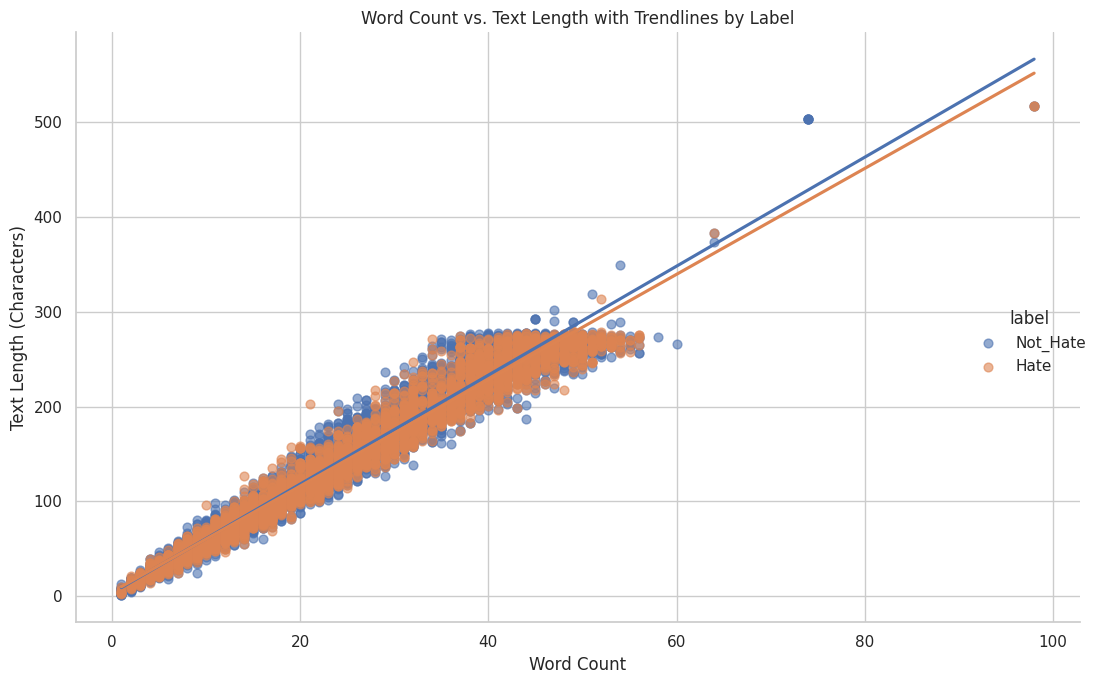

In [79]:


# Set plot size and style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Create the scatter plot with trendlines
sns.lmplot(
    data=df1,
    x='word_count',
    y='text_length',
    hue='label',
    scatter_kws={'alpha': 0.6, 's': 40},
    height=7,
    aspect=1.4,
    markers='o',
    ci=None  # Confidence interval off (like Plotly's OLS)
)

# Customize labels and title
plt.xlabel("Word Count")
plt.ylabel("Text Length (Characters)")
plt.title("Word Count vs. Text Length with Trendlines by Label")
plt.tight_layout()

plt.show()


**Observations**

1. Positive Correlation:

- A positive trend line across most or all categories suggests that as tweet length increases, the number of words also increases.

- This makes intuitive sense: longer tweets can hold more words.

2. Category Differences:

- Some categories tend to use longer or more complex words (lower word count for same tweet length).

- Others may use shorter, more concise language (higher word count for same tweet length).


3. Outliers:

- Points far from the trend line could be outliers most likely spam content, unusually wordy or concise tweets.

4. Compactness of Categories:

- Tightly clustered points imply similar writing style or length.

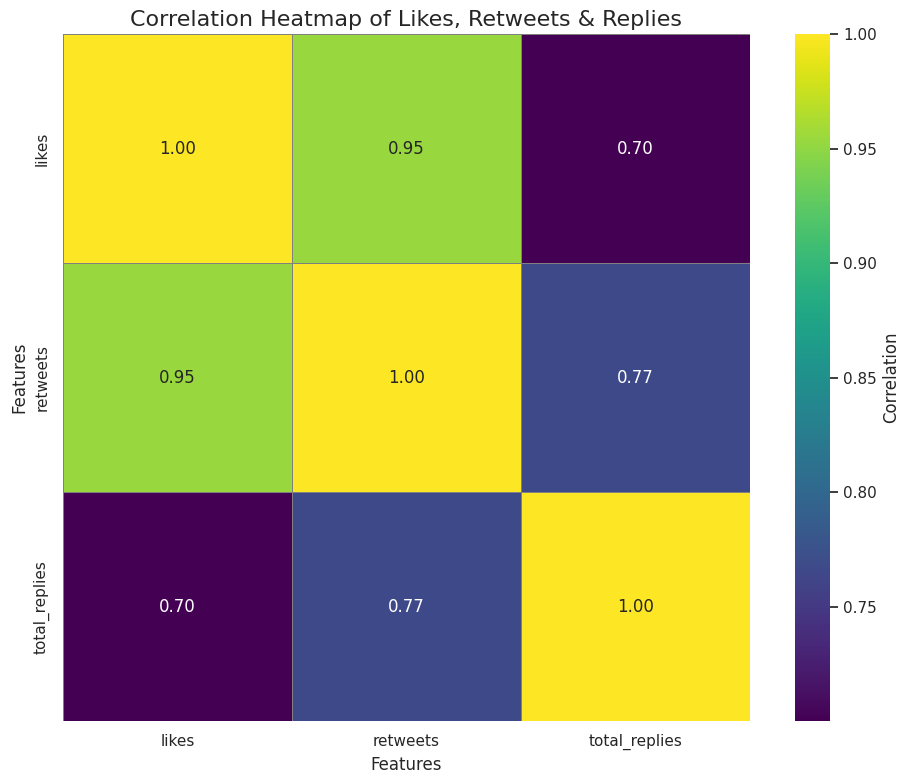

In [80]:
# Create the correlation matrix
corr_matrix = df1[['likes', 'retweets', 'total_replies']].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create the heatmap using seaborn
sns.heatmap(
    corr_matrix,
    annot=True,  # Show the correlation coefficients
    cmap='viridis',  # You can choose other color maps like 'coolwarm', 'cividis', etc.
    fmt=".2f",  # Format the correlation coefficients to 2 decimal places
    cbar_kws={'label': 'Correlation'},  # Label for the colorbar
    square=True,  # Make the heatmap square
    linewidths=0.5,  # Line width between cells
    linecolor='gray',  # Line color between cells
)

# Customize the title and labels
plt.title("Correlation Heatmap of Likes, Retweets & Replies", fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


**Observations**

1. Strong Positive Correlation Between Likes and Retweets

Correlation ≈ 0.95+ (very close to 1)

Indicates that tweets getting more likes are also highly likely to be retweeted, and vice versa.

These two features are likely reflecting similar audience engagement behaviors.

2. Moderate Correlation Between Retweets and Replies
The value seems lower (around ~0.76).

Suggests that while retweeted tweets may get replies, it's not as tightly linked as likes/retweets.

Retweets may spread content but not always spark conversation.

3. Lowest Correlation Between Likes and Replies
The correlation here is the weakest among the three pairs.

Implies that just because a tweet is liked doesn’t mean it generates a reply or discussion.

### PairPlot of numeric features.

<Figure size 1600x1600 with 0 Axes>

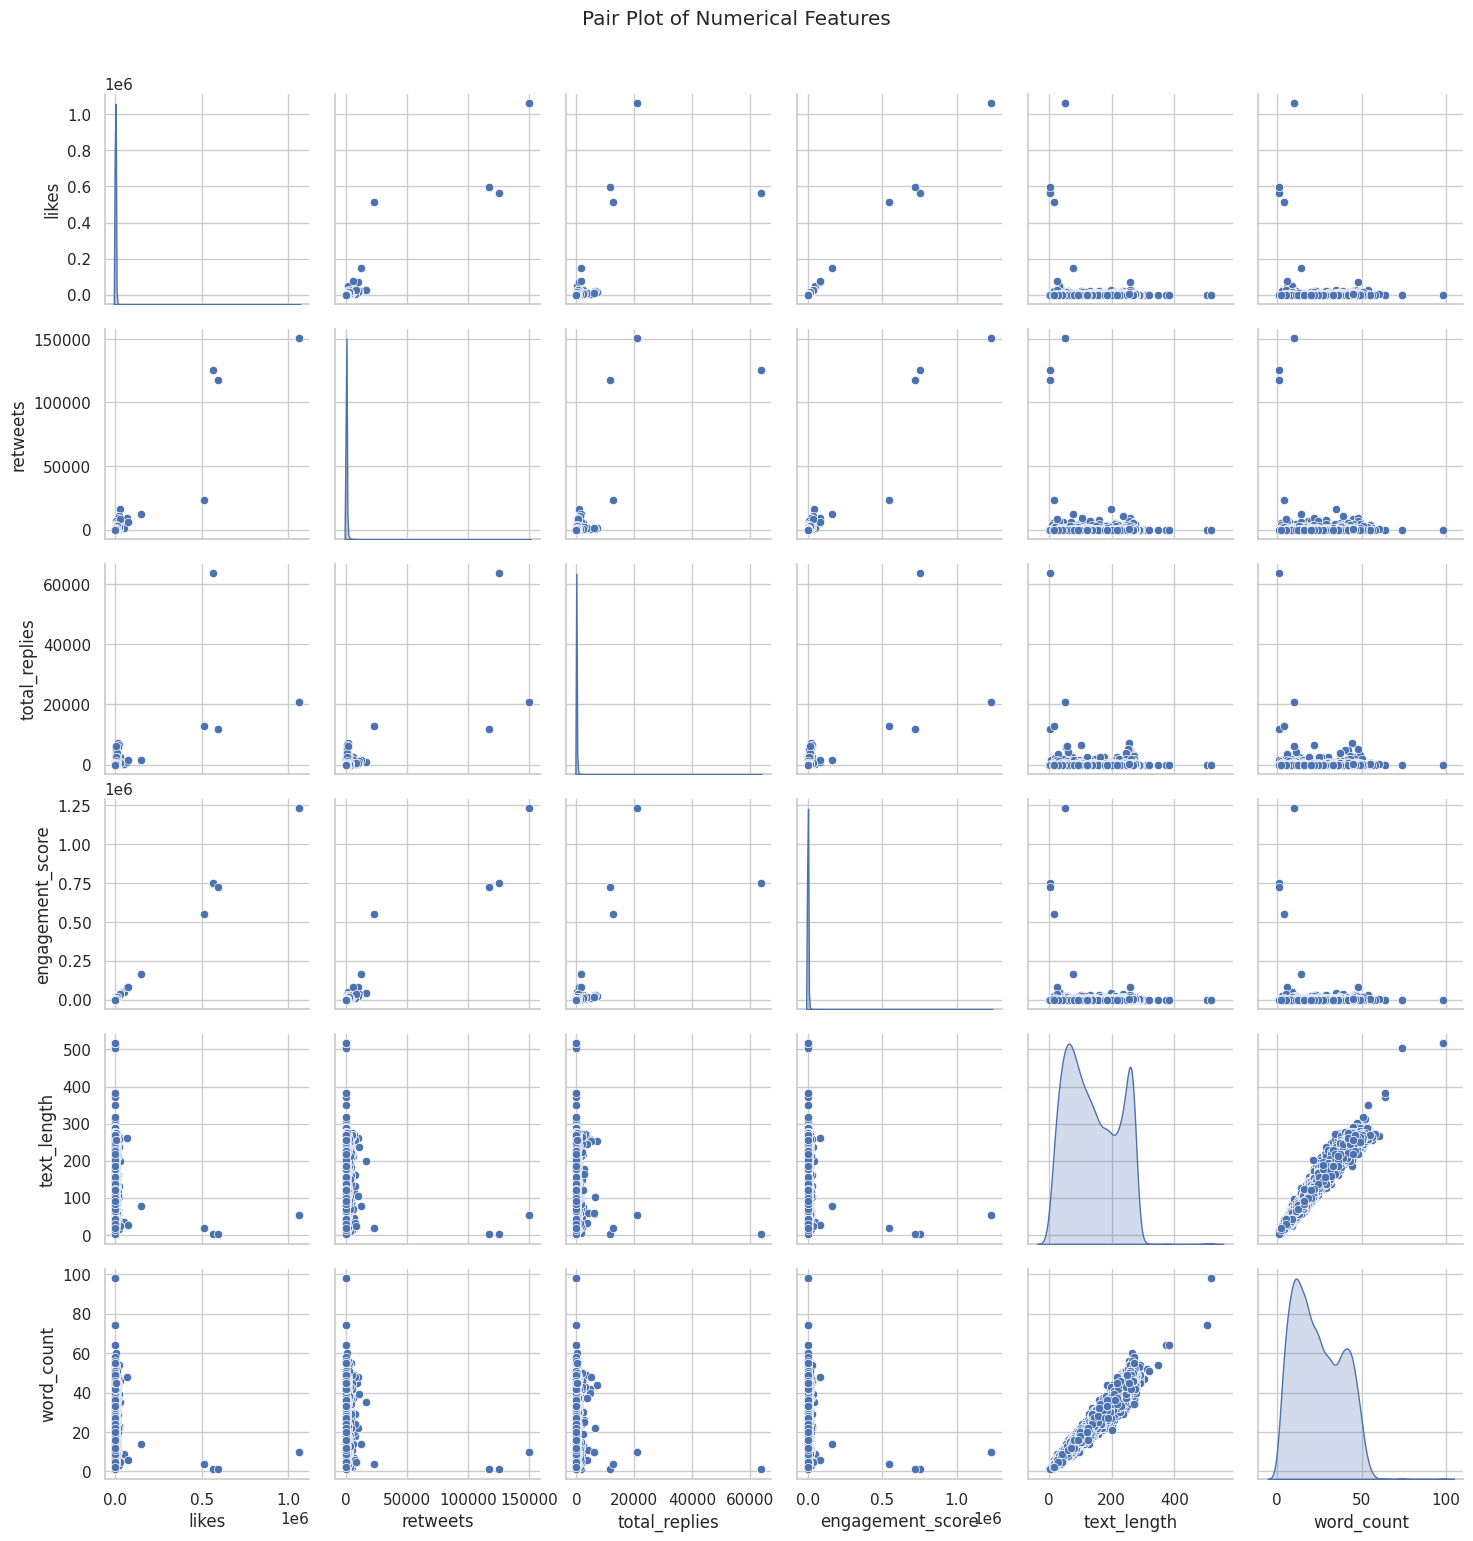

In [81]:

# Select relevant numerical columns
numerical_columns = [
    'likes', 'retweets', 'total_replies', 'engagement_score',
    'text_length', 'word_count'
]

# Subset the dataframe to include only the numerical columns
df_numerical = df1[numerical_columns]

# Create the pair plot
sns.set(style="whitegrid")
plt.figure(figsize=(16, 16))  # Set figure size

pair_plot = sns.pairplot(df_numerical, diag_kind='kde')

# Add a title to the entire plot
pair_plot.fig.suptitle("Pair Plot of Numerical Features", y=1.03)

plt.show();


#### Feature Pair	Observation:
1. likes vs retweets	Strong positive correlation — more retweets usually mean more likes.
2. likes vs engagement_score	Strong positive correlation — engagement score depends heavily on likes.
3. retweets vs engagement_score	Also positive but slightly more spread compared to likes.
4. text_length vs word_count	Strong linear relationship — as expected, more words lead to longer text.
5. likes, retweets vs total_replies	Some positive correlation but more scattered — replies vary a lot even for high likes or retweets.
6. total_replies vs engagement_score	Some relationship, but engagement is driven more by likes and retweets than replies alone.
7. text_length, word_count vs likes/retweets	Very weak relationship — longer text doesn’t guarantee higher engagement (likes/retweets).

# Preprocessing

## ML preprocessing

In [82]:
# Download necessary NLTK resources
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

# Define stopwords for English, Swahili, and Sheng
english_stopwords = set(stopwords.words('english'))
swahili_stopwords = set(["a",
    "akasema",
    "alikuwa",
    "alisema",
    "baadhi",
    "bila",
    "bwana",
    "hadi",
    "hata",
    "hii",
    "hivi",
    "huo",
    "ili",
    "ilikuwa",
    "juu",
    "kama",
    "karibu",
    "katika",
    "kila",
    "kisha",
    "kwamba",
    "kwani",
    "kwa",
    "kwanza",
    "lakini",
    "maana",
    "mimi",
    "mingi",
    "mmoja",
    "ndani",
    "ng'ambo",
    "nini",
    "nonkwe",
    "pamoja",
    "pia",
    "sana",
    "sasa",
    "sawa",
    "si",
    "sio",
    "tangu",
    "tena",
    "tu",
    "vile",
    "wa",
    "wako",
    "walikuwa",
    "waliosema",
    "wanasema",
    "watu",
    "wengine",
    "wote",
    "ya",
    "yake",
    "yao",
    "yeye",
    "yu",
    "za",
    "zake",
    "zile",
    "zingine"

])


# Combine stopwords
all_stopwords = english_stopwords.union(swahili_stopwords)

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove numbers and punctuation
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stopwords and apply lemmatization
    filtered_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in all_stopwords]

    # Return the cleaned text
    return ' '.join(filtered_tokens)

# Example usage on your dataset
df1['preprocessed_text'] = df1['cleaned_text'].apply(preprocess_text)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [89]:
# Ensure correct types
df1['preprocessed_text'] = df1['preprocessed_text'].astype(str)

# Separate features
text_col = 'preprocessed_text'
num_cols = df1.select_dtypes(include=['int64', 'float64']) \
              .drop(columns='label', errors='ignore') \
              .columns.tolist()
X = df1.drop(columns='label')
y = df1['label']

# Train-test split
X_train_df, X_test_df, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Vectorize text
text_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X_train_text = text_vectorizer.fit_transform(X_train_df[text_col])
X_test_text = text_vectorizer.transform(X_test_df[text_col])

# Impute and scale numerical features
imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()

X_train_num = imputer.fit_transform(X_train_df[num_cols])
X_test_num = imputer.transform(X_test_df[num_cols])

X_train_num = scaler.fit_transform(X_train_num)
X_test_num = scaler.transform(X_test_num)

# Combine text + numeric
X_train_combined = hstack([X_train_text, X_train_num])
X_test_combined  = hstack([X_test_text,  X_test_num])

# Determine # of components to retain 95% variance
svd_temp = TruncatedSVD(
    n_components=min(1000, X_train_combined.shape[1] - 1),
    random_state=42
)
svd_temp.fit(X_train_combined)
explained = np.cumsum(svd_temp.explained_variance_ratio_)
n_components_95 = np.argmax(explained >= 0.95) + 1
print(f"Selected number of components for 95% variance: {n_components_95}")

# Final SVD with optimal number of components
svd = TruncatedSVD(n_components=n_components_95, random_state=42)
X_train_pca = svd.fit_transform(X_train_combined)
X_test_pca  = svd.transform(X_test_combined)

# Define PCA component feature names
feature_names = [f"component_{i+1}" for i in range(n_components_95)]

Selected number of components for 95% variance: 486


Modeling is a crucial phase in any data science project, where the goal is to develop a mathematical or computational representation of the underlying patterns within the data. This phase involves selecting the appropriate algorithms, training the models, and evaluating their performance to ensure they generalize well to unseen data.

### Why is Modeling Important?
1. Prediction and Inference: Models help in predicting future outcomes and inferring relationships within the data.

2. Decision-Making: Accurate models support data-driven decisions.

3. Optimization: Models can be used to optimize processes or outcomes.

## Machine Learning **Models**

Machine Learning (ML) is a branch of Artificial Intelligence (AI) that enables computers to learn from data and improve their performance over time without being explicitly programmed. In ML, algorithms identify patterns in data, make predictions, and adapt to new information.



### **Model Initialization**

 Download a Python file called text_classifier.py from GitHub and save it locally in your Colab at /content/text_classifier.py.

In [90]:
!wget https://raw.githubusercontent.com/kennethnyangweso/CAPSTONE-PROJECT/main/text_classifier.py -O /content/text_classifier.py

--2025-05-05 22:33:12--  https://raw.githubusercontent.com/kennethnyangweso/CAPSTONE-PROJECT/main/text_classifier.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18096 (18K) [text/plain]
Saving to: ‘/content/text_classifier.py’

/content/text_class 100%[===================>]  17.67K  --.-KB/s    in 0.001s  

2025-05-05 22:33:12 (22.7 MB/s) - ‘/content/text_classifier.py’ saved [18096/18096]



This file contains the best models to perform text classification. It simplifies the modeling process by reducing the volume of code required to run the models while still maintaining effective running of the models.


In [91]:
with open('/content/text_classifier.py', 'r') as file:
    content = file.read()

print(content)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, List, Tuple, Optional, Union

from sklearn.base import BaseEstimator
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, learning_curve
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline


class TextClassifier:
    """A class for training and evaluating multiple text classification models.
    
    This version ass

The loaded file has a modeling pipeline to run the models, hyperparameter tune them and evaaluate them.

In [92]:
# Step 1: Add path
import sys
sys.path.append('/content')
# Step 2: Import
from text_classifier import TextClassifier

# Step 3: Now you can create an instance
classifier = TextClassifier(random_state=42)
classifier.set_feature_names(feature_names)



In [95]:
# Step 4: Add models, train, evaluate etc.
classifier.add_model("Logistic Regression", LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))
classifier.add_model("Linear SVM", LinearSVC(class_weight='balanced', random_state=42))
classifier.add_model("Random Forest", RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42))
classifier.add_model("Gradient Boosting", GradientBoostingClassifier(random_state=42))
classifier.add_model("Neural Network", MLPClassifier(max_iter=1000, hidden_layer_sizes=(100,50), random_state=42))


### **Base models**

The pipeline contains 6 default models ie :

*  Naive Bayes
*  Logistic Regression
*  Linear SVM
*  Random Forest
*  Gradient Boosting
*  Neural Network

In [96]:
#Train the base text classifiers
classifier.train_all_models(X_train_pca, y_train, handle_imbalance=True)


Training Logistic Regression...
Training Linear SVM...
Training Random Forest...
Training Gradient Boosting...
Training Neural Network...


{'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
 'Linear SVM': LinearSVC(class_weight='balanced', random_state=42),
 'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
 'Gradient Boosting': GradientBoostingClassifier(random_state=42),
 'Neural Network': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)}

#### *Evaluate the base models*

Evaluating Logistic Regression...
Evaluating Linear SVM...
Evaluating Random Forest...
Evaluating Gradient Boosting...
Evaluating Neural Network...

Best model: Logistic Regression with F1 score: 0.6609
Model: Logistic Regression
Accuracy: 0.6742
F1 Score: 0.6609


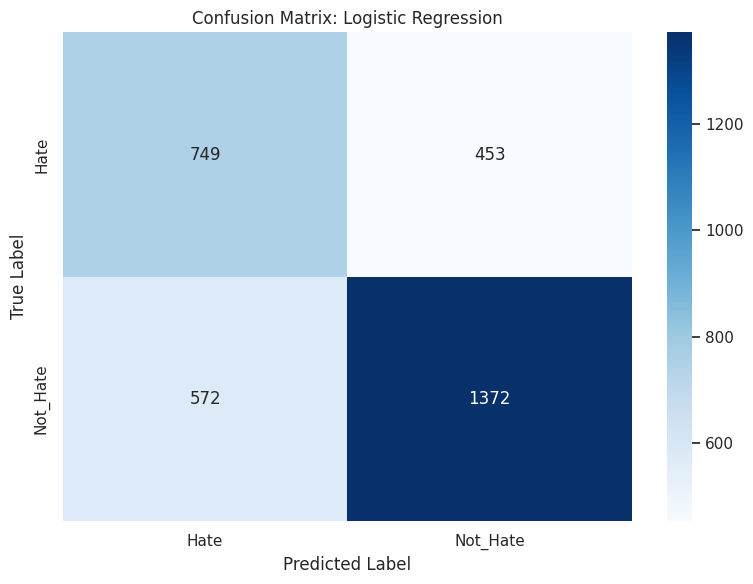

Model: Linear SVM
Accuracy: 0.6726
F1 Score: 0.6592


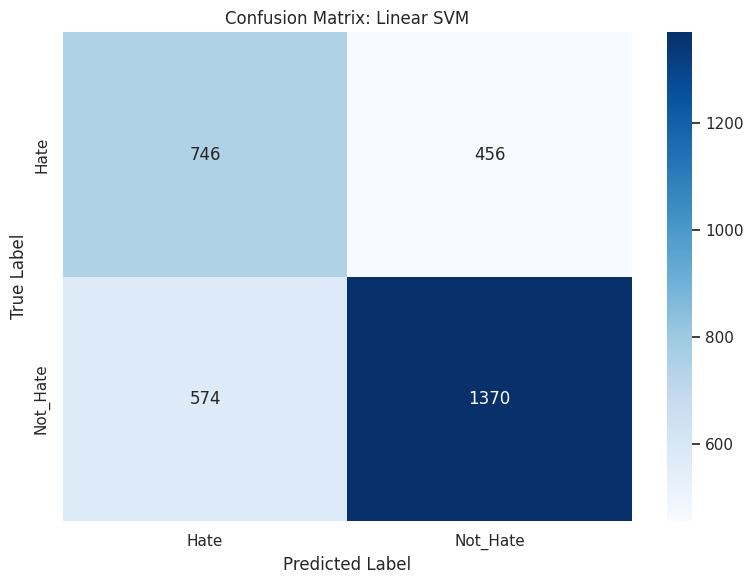

Model: Random Forest
Accuracy: 0.6224
F1 Score: 0.6000


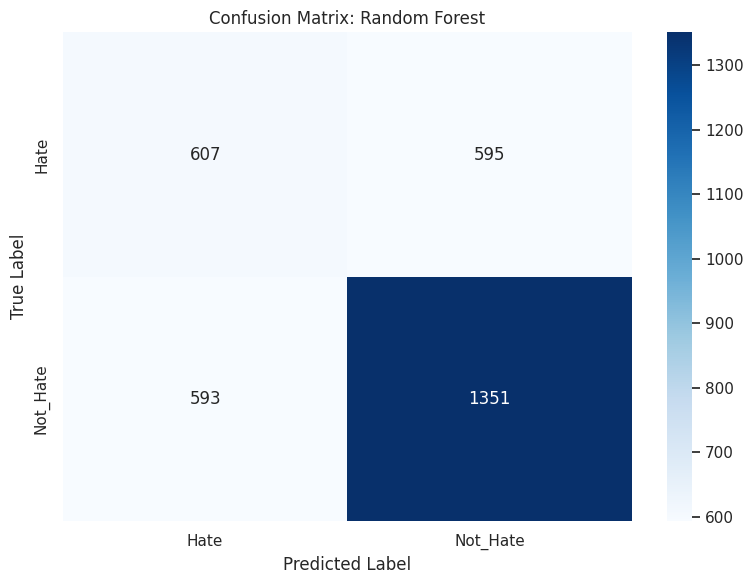

Model: Gradient Boosting
Accuracy: 0.6370
F1 Score: 0.6293


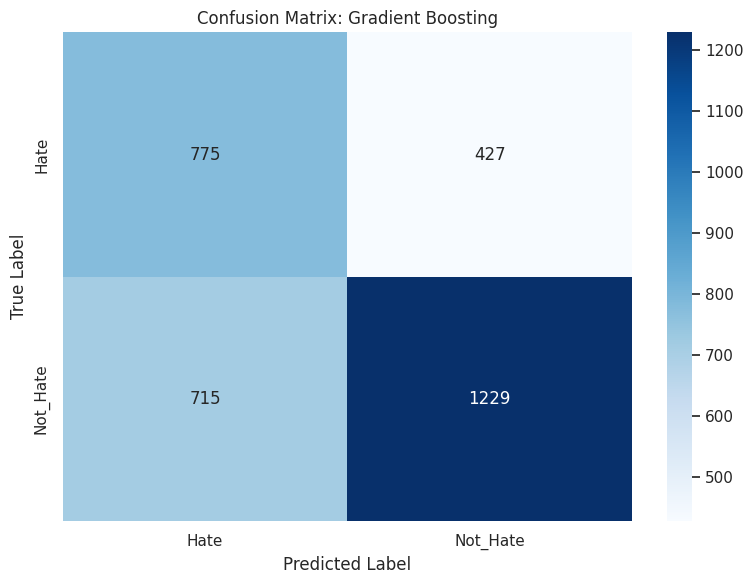

Model: Neural Network
Accuracy: 0.6408
F1 Score: 0.6211


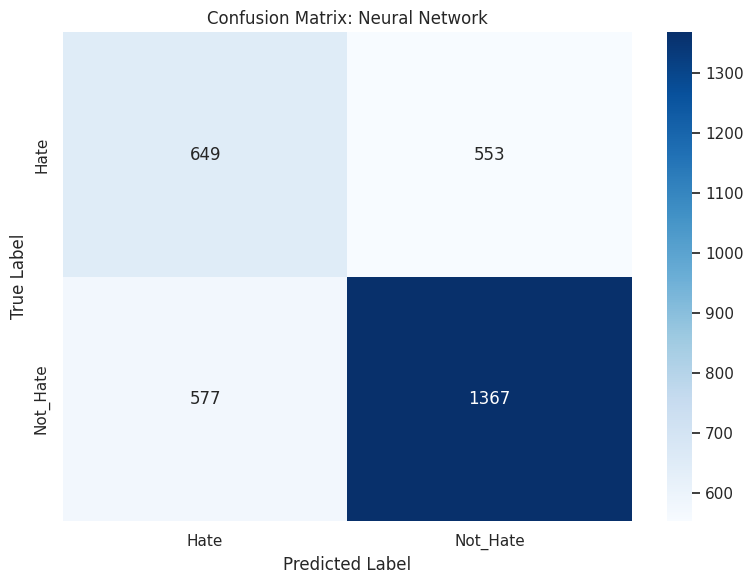

In [97]:
# Get unique class labels
class_names = np.unique(y_test)

# Evaluate each model
results = classifier.evaluate_all_models(X_test_pca, y_test)

# Plot function
def plot_confusion_matrix(cm, class_names, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title(f"Confusion Matrix: {title}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()

# Print and plot the evaluation results
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(f"F1 Score: {result['f1_score']:.4f}")

    # Get confusion matrix
    cm = result['confusion_matrix']


    # Plot confusion matrix
    plot_confusion_matrix(cm, class_names=class_names, title=model_name)




The best base model on ***F1_score*** is  **Logistic classifier** with F1 score: **0.6609**. However the f1_score is average meaning the model was classifying fairly okay.  The best way forward is to perform a hyperparameter search on the base models to get the best performing parameters for the models ensuring the best F1 score.


### Hyperparameter tuning

Above we can see the models performed averagely from the
average accuracy and F1 score. We attempt to tune the hyperparameters to get the parameters that will give us the best F1 score. The default cross validation search method for our pipeline is a **GridsearchCV**.

#### ***Support Vector Machine***

In [98]:
#Define the parameter grid
param_grid_svc = {
    'C': [0.01, 0.1, 1, 10, 100],            # Regularization parameter
    'class_weight': ['balanced', None], # Handle class imbalance
    'max_iter': [1000, 5000, 10000]      # Because LinearSVC sometimes needs more iterations
}
# Search best parameters giving highest F1 score
best_svc = classifier.tune_hyperparameters("Linear SVM", param_grid_svc,X_train_pca, y_train,cv=5, scoring="f1_macro")
# Evaluate the best model on the test set
y_pred_svc = best_svc.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred_svc)

# Print the accuracy
print(f"Best model Accuracy: {accuracy:.4f}")


Best parameters for Linear SVM: {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 1000}
Best f1_macro score: 0.6564
Best model Accuracy: 0.6793


The best parameters for the Linear Support vector machine still gives an average F1 score and accuracy but it is not higher than the best base model.

#### ***Logistic Classifier***

In [103]:
#Define the parameter grid
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200]
}

best_lr = classifier.tune_hyperparameters("Logistic Regression", param_grid_lr,X_train_pca, y_train,cv=5, scoring="f1_macro")

# Evaluate the best model on the test set
y_pred_lr = best_lr.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred_lr)

# Print the accuracy
print(f"Best model Accuracy: {accuracy:.4f}")


Best parameters for Logistic Regression: {'C': 1, 'max_iter': 100, 'solver': 'liblinear'}
Best f1_macro score: 0.6562
Best model Accuracy: 0.6780


This is the best performing model overall with an f1 score of 65.81%. This is however not a very reliable model with an accuracy of 65.72%. We try to ensemble the models to see if performance will increase

### **Ensembling the best performimg models**

We attempt to ensemble the best performing models to see if they will perform better by covering up each others weaknesses.

In [99]:
classifier.create_ensemble(model_names=["Logistic Regression", "Linear SVM", "Random Forest"], voting='hard')

classifier.models["Ensemble"].fit(X_train_pca, y_train)
classifier.trained_models["Ensemble"] = classifier.models["Ensemble"]

ensemble_results = classifier.evaluate_model("Ensemble", X_test_pca, y_test, detailed=True)

print("\n--- Ensemble Evaluation ---")
print("Ensemble Accuracy:", ensemble_results['accuracy'])
print("Ensemble Macro F1 Score:", ensemble_results['f1_score'])
print("Ensemble Classification Report:", ensemble_results['classification_report'])


--- Ensemble Evaluation ---
Ensemble Accuracy: 0.6586141131595677
Ensemble Macro F1 Score: 0.6509557693261269
Ensemble Classification Report: {'Hate': {'precision': 0.5433017591339648, 'recall': 0.668053244592346, 'f1-score': 0.5992537313432836, 'support': 1202.0}, 'Not_Hate': {'precision': 0.7607913669064749, 'recall': 0.6527777777777778, 'f1-score': 0.7026578073089701, 'support': 1944.0}, 'accuracy': 0.6586141131595677, 'macro avg': {'precision': 0.6520465630202199, 'recall': 0.6604155111850619, 'f1-score': 0.6509557693261269, 'support': 3146.0}, 'weighted avg': {'precision': 0.6776945746170416, 'recall': 0.6586141131595677, 'f1-score': 0.6631499562883868, 'support': 3146.0}}


The ensembled model did not perform better than the logistic regression on f1 score hence not suitable for our problem.

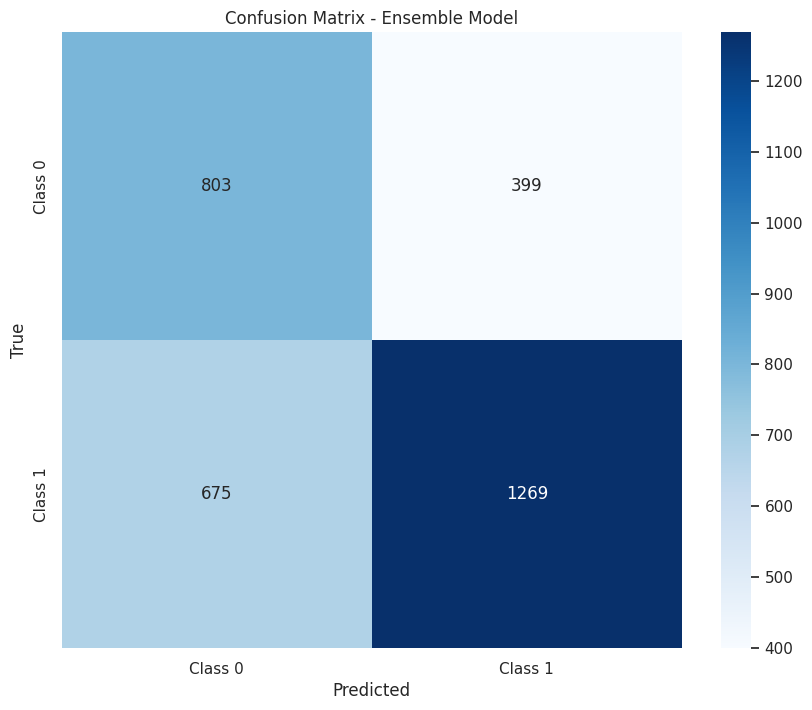

In [102]:
# Predict
y_pred_ensemble = classifier.trained_models["Ensemble"].predict(X_test_pca)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
ensemble_cm = confusion_matrix(y_test, y_pred_ensemble)

# Plot manually
plt.figure(figsize=(10, 8))
sns.heatmap(ensemble_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Class 0", "Class 1"],
            yticklabels=["Class 0", "Class 1"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Ensemble Model')
plt.show()


From this confusion matrix we can see our model is still misclassifying the minority classes heavily but performing somewhat well on the majority class.


### Next steps from Machine learning.



1.   Machine learning models performed very poorly especially on the minority classes even after dealing with imbalance meaning we might need more data to train the models on for them to capture underlying patterns well.

2.   We can try the deep learning approach to see if deep learning models might outperfrom the machine learning models and improve on their classification ability.

## Deep Learning Models

Since our traditional machine learning models are underperforming—particularly in correctly classifying the minority class—we will now explore deep learning approaches using Hugging Face Transformers. Transformers are state-of-the-art models in Natural Language Processing (NLP) that have demonstrated superior performance in a variety of text classification tasks, including those involving imbalanced and multilingual data.

**Why Use Hugging Face Transformers?**

- The main advantages of using Hugging Face transformers for this project include:

Multilingual Understanding: Our dataset contains tweets in various languages, including English and local dialects such as Sheng (a Swahili-English hybrid spoken in Kenya). Traditional models struggle with such linguistic diversity, but transformers like XLM-RoBERTa are trained on hundreds of languages and are capable of understanding context in multilingual settings.

Contextual Embeddings: Unlike classical methods like TF-IDF, which treat words independently, transformers generate contextual embeddings. This means that the meaning of a word is understood in relation to surrounding words, which is critical for nuanced tasks like hate speech detection.

Transfer Learning: Transformers are pre-trained on massive corpora and can be fine-tuned on smaller datasets. This makes them ideal for our use case, where the data size (~9700 tweets) may not be sufficient to train deep models from scratch.


## Microsoft/deberta-v3-base

The microsoft/deberta-v3-base is a pretrained transformer-based large language model from Microsoft, part of the DeBERTa (Decoding-enhanced BERT with disentangled attention) family. It is a highly optimized alternative to BERT and RoBERTa, designed to improve both accuracy and efficiency in NLP tasks.

### Key Features of DeBERTa V3
1. Disentangled Attention Mechanism- Separates content and position embeddings during attention, improving contextual understanding.

2. Enhanced Mask Decoder- Improves the masked language modeling objective by using a more refined decoding strategy during pretraining.

3. Better Generalization- Achieves higher accuracy than BERT and RoBERTa on various NLP benchmarks.

4. Efficient- It provides better performance with fewer parameters compared to older models.

### First trial with 2e-5 training rate, batch size of 16 , 4 epochs and weight decay of 0.01.

/usr/local/lib/python3.11/dist-packages/transformers/convert_slow_tokenizer.py:559: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/371M [00:00<?, ?B/s]

Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/7760 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


model.safetensors:   0%|          | 0.00/371M [00:00<?, ?B/s]

Map:   0%|          | 0/1941 [00:00<?, ? examples/s]

<ipython-input-4-5b2b333dbb5d>:74: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss
1000,0.587700
2000,0.442400
3000,0.327600


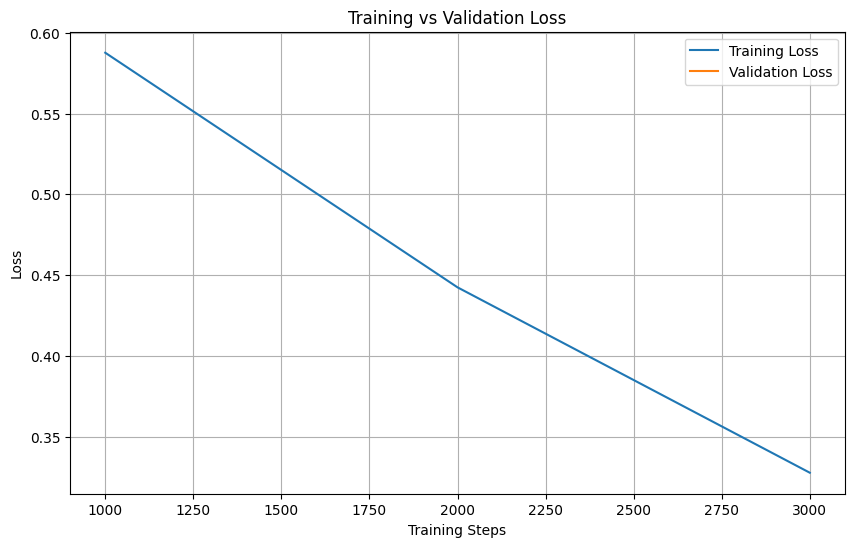


📊 Train Accuracy: 0.9093
📊 Train F1 Score: 0.9069
✅ Validation Accuracy: 0.6589
✅ Validation F1 Score: 0.6469


In [4]:
# Free GPU memory
torch.cuda.empty_cache()
gc.collect()
torch.cuda.empty_cache()

# Load and clean data
df = pd.read_csv('labeled_kenyan_hatespeech.csv')
df['label'] = df['label'].str.lower()
df = df[df['label'].isin(['neutral', 'hate', 'offensive'])]

# Merge labels
df['label'] = df['label'].replace({'hate': 'hatespeech', 'offensive': 'hatespeech', 'neutral': 'not_hatespeech'})

# Encode labels
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

# Train-validation split
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['cleaned_text'].tolist(),
    df['label_encoded'].tolist(),
    test_size=0.2,
    stratify=df['label_encoded'],
    random_state=42
)

# Load model and tokenizer
model_name = "microsoft/deberta-v3-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Prepare Hugging Face datasets
train_dataset = HFDataset.from_dict({"text": train_texts, "label": train_labels})
val_dataset = HFDataset.from_dict({"text": val_texts, "label": val_labels})

def tokenize_function(examples):
    return tokenizer(examples["text"], truncation=True)

train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)

train_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
val_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# Training arguments
training_args = TrainingArguments(
    output_dir="./deberta_base_hatespeech_1",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=8,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=1000,
    save_steps=500,  # Save model every N steps
    eval_steps=500,  # Evaluate every N steps
    save_total_limit=2,  # Limit saved checkpoints
    do_eval=True,
    fp16=torch.cuda.is_available(),
    report_to="none"  # Avoid WandB errors
)

# Metrics
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = torch.argmax(torch.tensor(logits), dim=-1)
    acc = accuracy_score(labels, predictions)
    f1 = f1_score(labels, predictions, average="macro")
    return {"accuracy": acc, "f1": f1}

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

# Train
trainer.train()

# Plot training and validation loss
logs = trainer.state.log_history
train_steps, train_losses, eval_steps, eval_losses = [], [], [], []

for entry in logs:
    if 'loss' in entry and 'step' in entry:
        train_steps.append(entry['step'])
        train_losses.append(entry['loss'])
    if 'eval_loss' in entry:
        eval_steps.append(entry['step'])
        eval_losses.append(entry['eval_loss'])

plt.figure(figsize=(10, 6))
plt.plot(train_steps, train_losses, label="Training Loss")
plt.plot(eval_steps, eval_losses, label="Validation Loss")
plt.xlabel("Training Steps")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

# Evaluate
train_metrics = trainer.evaluate(train_dataset)
val_metrics = trainer.evaluate(val_dataset)
print(f"\n📊 Train Accuracy: {train_metrics['eval_accuracy']:.4f}")
print(f"📊 Train F1 Score: {train_metrics['eval_f1']:.4f}")
print(f"✅ Validation Accuracy: {val_metrics['eval_accuracy']:.4f}")
print(f"✅ Validation F1 Score: {val_metrics['eval_f1']:.4f}")

# Confusion matrix
predictions = trainer.predict(val_dataset)
y_pred = torch.argmax(torch.tensor(predictions.predictions), dim=-1)
y_true = predictions.label_ids

cm = confusion_matrix(y_true, y_pred)
labels = le.classes_.tolist()

fig = ff.create_annotated_heatmap(
    z=cm.tolist(),
    x=labels,
    y=labels,
    colorscale='Blues',
    showscale=True,
    annotation_text=cm.astype(str).tolist()
)

fig.update_layout(
    title_text='Confusion Matrix (Validation Set)',
    xaxis_title='Predicted Label',
    yaxis_title='True Label'
)

fig.show()


This model has an accuracy score of 68.52% and an F1 score of 67.48%. This is a fairly good model. It is classyfying quite better than the machine learning models. We can however try reducing the learning rate and  increasing batch size to see if it will improve performance.

### Second trial with 1e-6 training rate, batch size of 32 , 25 epochs, an early stopping with a patience of 2 to allow 2 logs where it doesn't show significant improvement in the validation accuracy and weight decay of 0.01.

In [ ]:
# Free GPU memory
torch.cuda.empty_cache()
gc.collect()
torch.cuda.empty_cache()

# Load and clean data
df = pd.read_csv('labeled_kenyan_hatespeech.csv')
df['label'] = df['label'].str.lower()
df = df[df['label'].isin(['neutral', 'hate', 'offensive'])]

# Merge labels
df['label'] = df['label'].replace({'hate': 'hatespeech', 'offensive': 'hatespeech', 'neutral': 'not_hatespeech'})

# Encode labels
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

# Train-validation split
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['cleaned_text'].tolist(),
    df['label_encoded'].tolist(),
    test_size=0.2,
    stratify=df['label_encoded'],
    random_state=42
)

# Load model and tokenizer
model_name = "microsoft/deberta-v3-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Prepare Hugging Face datasets
train_dataset = HFDataset.from_dict({"text": train_texts, "label": train_labels})
val_dataset = HFDataset.from_dict({"text": val_texts, "label": val_labels})

# Tokenization with padding/truncation
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=256)

train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)

train_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
val_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# Training arguments
training_args = TrainingArguments(
    output_dir="./deberta_base_hatespeech_2",
    learning_rate=1e-6,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=15,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    eval_strategy="steps",
    save_strategy="steps",
    eval_steps=500,
    save_steps=500,
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    fp16=torch.cuda.is_available(),
    report_to="none"
)

# Metrics
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = torch.argmax(torch.tensor(logits), dim=-1)
    acc = accuracy_score(labels, predictions)
    f1 = f1_score(labels, predictions, average="macro")
    return {"accuracy": acc, "f1": f1}

# Trainer with Early Stopping
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)],
)

# Train
trainer.train()

# Plot training and validation loss
logs = trainer.state.log_history
train_steps, train_losses, eval_steps, eval_losses = [], [], [], []

for entry in logs:
    if 'loss' in entry and 'step' in entry:
        train_steps.append(entry['step'])
        train_losses.append(entry['loss'])
    if 'eval_loss' in entry:
        eval_steps.append(entry['step'])
        eval_losses.append(entry['eval_loss'])

plt.figure(figsize=(10, 6))
plt.plot(train_steps, train_losses, label="Training Loss")
plt.plot(eval_steps, eval_losses, label="Validation Loss")
plt.xlabel("Training Steps")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

# Evaluate
train_metrics = trainer.evaluate(train_dataset)
val_metrics = trainer.evaluate(val_dataset)
print(f"\n📊 Train Accuracy: {train_metrics['eval_accuracy']:.4f}")
print(f"📊 Train F1 Score: {train_metrics['eval_f1']:.4f}")
print(f"✅ Validation Accuracy: {val_metrics['eval_accuracy']:.4f}")
print(f"✅ Validation F1 Score: {val_metrics['eval_f1']:.4f}")

# Confusion matrix
predictions = trainer.predict(val_dataset)
y_pred = torch.argmax(torch.tensor(predictions.predictions), dim=-1)
y_true = predictions.label_ids

cm = confusion_matrix(y_true, y_pred)
labels = le.classes_.tolist()
print(cm)

fig = ff.create_annotated_heatmap(
    z=cm.tolist(),
    x=labels,
    y=labels,
    colorscale='Blues',
    showscale=True,
    annotation_text=cm.astype(str).tolist()
)

fig.update_layout(
    title_text='Confusion Matrix (Validation Set)',
    xaxis_title='Predicted Label',
    yaxis_title='True Label'
)

fig.show()

/usr/local/lib/python3.11/dist-packages/transformers/convert_slow_tokenizer.py:559: UserWarning:

The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.

Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/7760 [00:00<?, ? examples/s]

Map:   0%|          | 0/1941 [00:00<?, ? examples/s]

<ipython-input-5-63ba0256fe2f>:78: FutureWarning:

`tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.



Step,Training Loss,Validation Loss,Accuracy,F1
500,0.604000,0.630476,0.608964,0.432670
1000,0.577400,0.600638,0.671819,0.649674
1500,0.593500,0.594394,0.678516,0.669592
2000,0.580300,0.590131,0.674395,0.668947
2500,0.494700,0.590205,0.681607,0.674692


 Third trial with 2e-6 training rate, batch size of 32 , 15 epochs and weight decay of 0.1.

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/578 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/convert_slow_tokenizer.py:559: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/286M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/286M [00:00<?, ?B/s]

Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-small and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/7760 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Map:   0%|          | 0/1941 [00:00<?, ? examples/s]

<ipython-input-4-c7fdaa77e703>:76: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss,Validation Loss,Accuracy,F1
500,0.587800,0.607434,0.671819,0.635853
1000,0.541400,0.591593,0.685214,0.663032
1500,0.562600,0.584657,0.684699,0.673401
2000,0.553000,0.582201,0.679031,0.667332


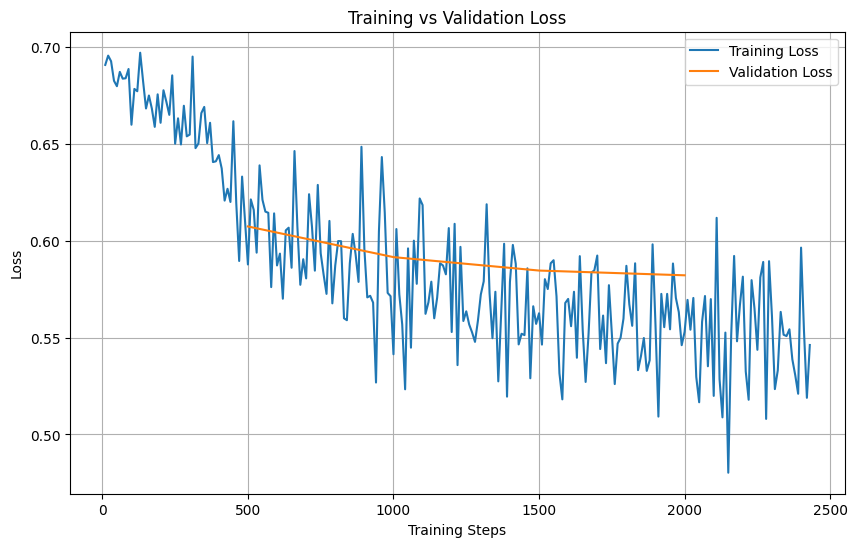


📊 Train Accuracy: 0.7232
📊 Train F1 Score: 0.7141
✅ Validation Accuracy: 0.6790
✅ Validation F1 Score: 0.6673
[[477 296]
 [327 841]]


In [4]:
# Free GPU memory
torch.cuda.empty_cache()
gc.collect()
torch.cuda.empty_cache()

# Load and clean data
df = pd.read_csv('labeled_kenyan_hatespeech.csv')
df['label'] = df['label'].str.lower()
df = df[df['label'].isin(['neutral', 'hate', 'offensive'])]

# Merge labels
df['label'] = df['label'].replace({'hate': 'hatespeech', 'offensive': 'hatespeech', 'neutral': 'not_hatespeech'})

# Encode labels
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

# Train-validation split
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['cleaned_text'].tolist(),
    df['label_encoded'].tolist(),
    test_size=0.2,
    stratify=df['label_encoded'],
    random_state=42
)

# Load model and tokenizer
model_name = "microsoft/deberta-v3-small"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Prepare Hugging Face datasets
train_dataset = HFDataset.from_dict({"text": train_texts, "label": train_labels})
val_dataset = HFDataset.from_dict({"text": val_texts, "label": val_labels})

def tokenize_function(examples):
    return tokenizer(examples["text"], truncation=True)

train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)

train_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
val_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# Training arguments
training_args = TrainingArguments(
    output_dir="./deberta_base_hatespeech_3",
    learning_rate=2e-6,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=10,
    weight_decay=0.1,
    logging_dir='./logs',
    logging_steps=10,
    eval_strategy="steps",
    save_strategy="steps",
    eval_steps=500,
    save_steps=500,
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    fp16=torch.cuda.is_available(),
    report_to="none"
)
# Metrics
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = torch.argmax(torch.tensor(logits), dim=-1)
    acc = accuracy_score(labels, predictions)
    f1 = f1_score(labels, predictions, average="macro")
    return {"accuracy": acc, "f1": f1}

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

# Train
trainer.train()

# Plot training and validation loss
logs = trainer.state.log_history
train_steps, train_losses, eval_steps, eval_losses = [], [], [], []

for entry in logs:
    if 'loss' in entry and 'step' in entry:
        train_steps.append(entry['step'])
        train_losses.append(entry['loss'])
    if 'eval_loss' in entry:
        eval_steps.append(entry['step'])
        eval_losses.append(entry['eval_loss'])

plt.figure(figsize=(10, 6))
plt.plot(train_steps, train_losses, label="Training Loss")
plt.plot(eval_steps, eval_losses, label="Validation Loss")
plt.xlabel("Training Steps")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

# Evaluate
train_metrics = trainer.evaluate(train_dataset)
val_metrics = trainer.evaluate(val_dataset)
print(f"\n📊 Train Accuracy: {train_metrics['eval_accuracy']:.4f}")
print(f"📊 Train F1 Score: {train_metrics['eval_f1']:.4f}")
print(f"✅ Validation Accuracy: {val_metrics['eval_accuracy']:.4f}")
print(f"✅ Validation F1 Score: {val_metrics['eval_f1']:.4f}")

# Confusion matrix
predictions = trainer.predict(val_dataset)
y_pred = torch.argmax(torch.tensor(predictions.predictions), dim=-1)
y_true = predictions.label_ids

cm = confusion_matrix(y_true, y_pred)
labels = le.classes_.tolist()
print(cm)
fig = ff.create_annotated_heatmap(
    z=cm.tolist(),
    x=labels,
    y=labels,
    colorscale='Blues',
    showscale=True,
    annotation_text=cm.astype(str).tolist()
)

fig.update_layout(
    title_text='Confusion Matrix (Validation Set)',
    xaxis_title='Predicted Label',
    yaxis_title='True Label'
)

fig.show()

This model has an accuracy score of 68.32% and an F1 score of 66.95%. This is a fairly good model. However it perform isnt performing better then model 1.

Forth try with 1e-6 learning rate, batch size of 32, 15 epochs , 0.1 weight decay and an early stopping with a patience of 2 to allow 2 logs where it doesn't show significant improvement in the validation accuracy.

tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/579 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/convert_slow_tokenizer.py:559: UserWarning:

The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.



pytorch_model.bin:   0%|          | 0.00/371M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/371M [00:00<?, ?B/s]

Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/7760 [00:00<?, ? examples/s]

Map:   0%|          | 0/1941 [00:00<?, ? examples/s]

<ipython-input-5-71e5937de1c5>:78: FutureWarning:

`tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.



Step,Training Loss,Validation Loss,Accuracy,F1
500,0.560800,0.586290,0.691911,0.664264
1000,0.392700,0.641011,0.683153,0.680022
1500,0.350000,0.739910,0.678001,0.671551


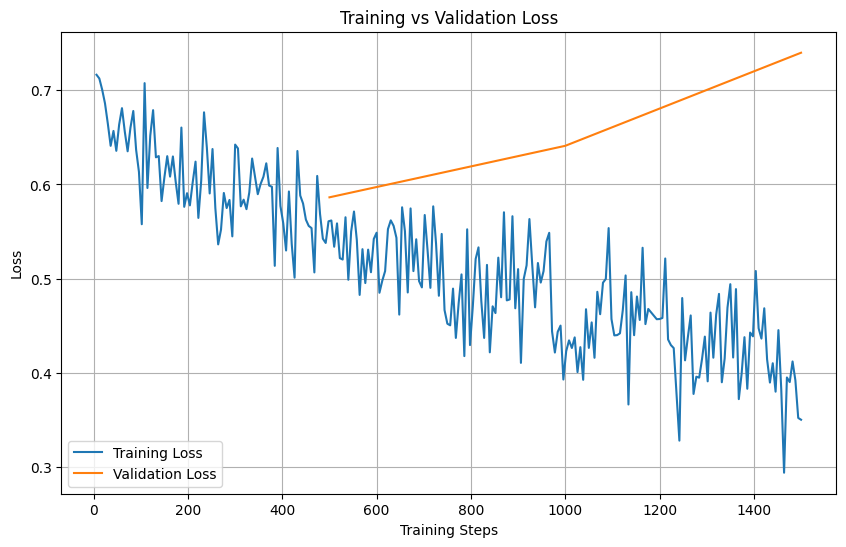


📊 Train Accuracy: 0.7267
📊 Train F1 Score: 0.7040
✅ Validation Accuracy: 0.6919
✅ Validation F1 Score: 0.6643
[[393 380]
 [218 950]]


In [5]:
# Free GPU memory
torch.cuda.empty_cache()
gc.collect()
torch.cuda.empty_cache()

# Load and clean data
df = pd.read_csv('labeled_kenyan_hatespeech.csv')
df['label'] = df['label'].str.lower()
df = df[df['label'].isin(['neutral', 'hate', 'offensive'])]

# Merge labels
df['label'] = df['label'].replace({'hate': 'hatespeech', 'offensive': 'hatespeech', 'neutral': 'not_hatespeech'})

# Encode labels
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

# Train-validation split
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['cleaned_text'].tolist(),
    df['label_encoded'].tolist(),
    test_size=0.2,
    stratify=df['label_encoded'],
    random_state=42
)

# Load model and tokenizer
model_name = "microsoft/deberta-v3-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Prepare Hugging Face datasets
train_dataset = HFDataset.from_dict({"text": train_texts, "label": train_labels})
val_dataset = HFDataset.from_dict({"text": val_texts, "label": val_labels})

# Tokenization with padding/truncation
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=256)

train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)

train_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
val_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# Training arguments
training_args = TrainingArguments(
    output_dir="./deberta_base_hatespeech_4",
    learning_rate=1e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=6,
    weight_decay=0.1,
    logging_dir='./logs',
    logging_steps=6,
    eval_strategy="steps",
    save_strategy="steps",
    eval_steps=500,
    save_steps=500,
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    fp16=torch.cuda.is_available(),
    report_to="none"
)

# Metrics
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = torch.argmax(torch.tensor(logits), dim=-1)
    acc = accuracy_score(labels, predictions)
    f1 = f1_score(labels, predictions, average="macro")
    return {"accuracy": acc, "f1": f1}

# Trainer with Early Stopping
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)],
)

# Train
trainer.train()

# Plot training and validation loss
logs = trainer.state.log_history
train_steps, train_losses, eval_steps, eval_losses = [], [], [], []

for entry in logs:
    if 'loss' in entry and 'step' in entry:
        train_steps.append(entry['step'])
        train_losses.append(entry['loss'])
    if 'eval_loss' in entry:
        eval_steps.append(entry['step'])
        eval_losses.append(entry['eval_loss'])

plt.figure(figsize=(10, 6))
plt.plot(train_steps, train_losses, label="Training Loss")
plt.plot(eval_steps, eval_losses, label="Validation Loss")
plt.xlabel("Training Steps")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

# Evaluate
train_metrics = trainer.evaluate(train_dataset)
val_metrics = trainer.evaluate(val_dataset)
print(f"\n📊 Train Accuracy: {train_metrics['eval_accuracy']:.4f}")
print(f"📊 Train F1 Score: {train_metrics['eval_f1']:.4f}")
print(f"✅ Validation Accuracy: {val_metrics['eval_accuracy']:.4f}")
print(f"✅ Validation F1 Score: {val_metrics['eval_f1']:.4f}")

# Confusion matrix
predictions = trainer.predict(val_dataset)
y_pred = torch.argmax(torch.tensor(predictions.predictions), dim=-1)
y_true = predictions.label_ids

cm = confusion_matrix(y_true, y_pred)
labels = le.classes_.tolist()
print(cm)

fig = ff.create_annotated_heatmap(
    z=cm.tolist(),
    x=labels,
    y=labels,
    colorscale='Blues',
    showscale=True,
    annotation_text=cm.astype(str).tolist()
)

fig.update_layout(
    title_text='Confusion Matrix (Validation Set)',
    xaxis_title='Predicted Label',
    yaxis_title='True Label'
)

fig.show()

This model has an accuracy score of 69.19% and an F1 score of 66.43. This is a fairly good model. However it is not performing better than model 1 on F1 score.

In [9]:
torch.save(model.state_dict(), './deberta_base_hatespeech_4/pytorch_model.bin')

from google.colab import files
files.download('./deberta_base_hatespeech_4/pytorch_model.bin')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
model.save_pretrained("./deberta_base_hatespeech_4")
tokenizer.save_pretrained("./deberta_base_hatespeech_4")
import shutil

shutil.make_archive("deberta_base_hatespeech_4", 'zip', "deberta_base_hatespeech_4")
from google.colab import files
files.download("deberta_base_hatespeech_4.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Fifth try with 2e-6 learning rate, batch size of 32, 15 epochs , 0.1 weight decay and an early stopping with a patience of 2 to allow 2 logs where it doesn't show significant improvement in the validation accuracy.

/usr/local/lib/python3.11/dist-packages/transformers/convert_slow_tokenizer.py:559: UserWarning:

The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.

Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/7760 [00:00<?, ? examples/s]

Map:   0%|          | 0/1941 [00:00<?, ? examples/s]

<ipython-input-6-c7156e6555cd>:78: FutureWarning:

`tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.



Step,Training Loss,Validation Loss,Accuracy,F1
500,0.476400,0.560481,0.704791,0.695103
1000,0.318600,0.774572,0.668212,0.663774


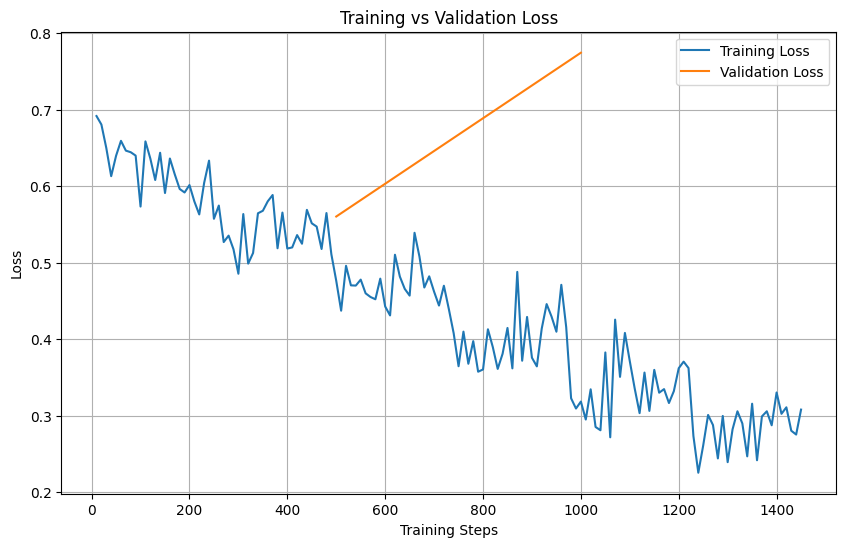


📊 Train Accuracy: 0.7970
📊 Train F1 Score: 0.7907
✅ Validation Accuracy: 0.7048
✅ Validation F1 Score: 0.6951
[[511 262]
 [311 857]]


In [6]:
# Free GPU memory
torch.cuda.empty_cache()
gc.collect()
torch.cuda.empty_cache()

# Load and clean data
df = pd.read_csv('labeled_kenyan_hatespeech.csv')
df['label'] = df['label'].str.lower()
df = df[df['label'].isin(['neutral', 'hate', 'offensive'])]

# Merge labels
df['label'] = df['label'].replace({'hate': 'hatespeech', 'offensive': 'hatespeech', 'neutral': 'non_hatespeech'})

# Encode labels
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

# Train-validation split
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['cleaned_text'].tolist(),
    df['label_encoded'].tolist(),
    test_size=0.2,
    stratify=df['label_encoded'],
    random_state=42
)

# Load model and tokenizer
model_name = "microsoft/deberta-v3-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Prepare Hugging Face datasets
train_dataset = HFDataset.from_dict({"text": train_texts, "label": train_labels})
val_dataset = HFDataset.from_dict({"text": val_texts, "label": val_labels})

# Tokenization with padding/truncation
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=256)

train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)

train_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
val_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# Training arguments
training_args = TrainingArguments(
    output_dir="./deberta_base_hatespeech_5",
    learning_rate=3e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=6,
    weight_decay=0.1,
    logging_dir='./logs',
    logging_steps=10,
    eval_strategy="steps",
    save_strategy="steps",
    eval_steps=500,
    save_steps=500,
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    fp16=torch.cuda.is_available(),
    report_to="none"
)

# Metrics
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = torch.argmax(torch.tensor(logits), dim=-1)
    acc = accuracy_score(labels, predictions)
    f1 = f1_score(labels, predictions, average="macro")
    return {"accuracy": acc, "f1": f1}

# Trainer with Early Stopping
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)],
)

# Train
trainer.train()

# Plot training and validation loss
logs = trainer.state.log_history
train_steps, train_losses, eval_steps, eval_losses = [], [], [], []

for entry in logs:
    if 'loss' in entry and 'step' in entry:
        train_steps.append(entry['step'])
        train_losses.append(entry['loss'])
    if 'eval_loss' in entry:
        eval_steps.append(entry['step'])
        eval_losses.append(entry['eval_loss'])

plt.figure(figsize=(10, 6))
plt.plot(train_steps, train_losses, label="Training Loss")
plt.plot(eval_steps, eval_losses, label="Validation Loss")
plt.xlabel("Training Steps")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

# Evaluate
train_metrics = trainer.evaluate(train_dataset)
val_metrics = trainer.evaluate(val_dataset)
print(f"\n📊 Train Accuracy: {train_metrics['eval_accuracy']:.4f}")
print(f"📊 Train F1 Score: {train_metrics['eval_f1']:.4f}")
print(f"✅ Validation Accuracy: {val_metrics['eval_accuracy']:.4f}")
print(f"✅ Validation F1 Score: {val_metrics['eval_f1']:.4f}")

# Confusion matrix
predictions = trainer.predict(val_dataset)
y_pred = torch.argmax(torch.tensor(predictions.predictions), dim=-1)
y_true = predictions.label_ids

cm = confusion_matrix(y_true, y_pred)
labels = le.classes_.tolist()
print(cm)

fig = ff.create_annotated_heatmap(
    z=cm.tolist(),
    x=labels,
    y=labels,
    colorscale='Blues',
    showscale=True,
    annotation_text=cm.astype(str).tolist()
)

fig.update_layout(
    title_text='Confusion Matrix (Validation Set)',
    xaxis_title='Predicted Label',
    yaxis_title='True Label'
)

fig.show()

This model has an accuracy score of 70.48% and an F1 score of 69.41%. This is a good model. It is classyfying quite better than the first model due to a higher f1 score and the higher accuracy. We save this model in preparation for deployment.

Sixth try with 3e-6 learning rate, batch size of 32, 10 epochs , 0.1 weight decay and an early stopping with a patience of 2 to allow 2 logs where it doesn't show significant improvement in the validation accuracy.

/usr/local/lib/python3.11/dist-packages/transformers/convert_slow_tokenizer.py:559: UserWarning:

The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.

Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/7760 [00:00<?, ? examples/s]

Map:   0%|          | 0/1941 [00:00<?, ? examples/s]

<ipython-input-14-4b414106f99d>:78: FutureWarning:

`tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.



Step,Training Loss,Validation Loss


Step,Training Loss,Validation Loss,Accuracy,F1
500,0.662500,0.634170,0.644513,0.537099
1000,0.526400,0.592545,0.684699,0.662000
1500,0.579800,0.598199,0.684699,0.662193
2000,0.513300,0.608780,0.678516,0.673049


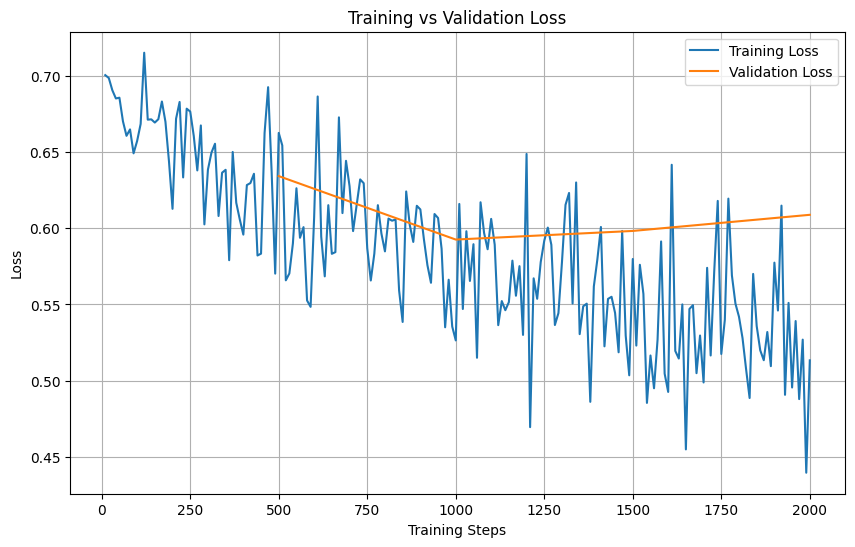


📊 Train Accuracy: 0.7062
📊 Train F1 Score: 0.6869
✅ Validation Accuracy: 0.6847
✅ Validation F1 Score: 0.6620
[[413 360]
 [252 916]]


In [14]:
# Free GPU memory
torch.cuda.empty_cache()
gc.collect()
torch.cuda.empty_cache()

# Load and clean data
df = pd.read_csv('labeled_kenyan_hatespeech.csv')
df['label'] = df['label'].str.lower()
df = df[df['label'].isin(['neutral', 'hate', 'offensive'])]

# Merge labels
df['label'] = df['label'].replace({'hate': 'hatespeech', 'offensive': 'hatespeech', 'neutral': 'not_hatespeech'})

# Encode labels
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

# Train-validation split
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['cleaned_text'].tolist(),
    df['label_encoded'].tolist(),
    test_size=0.2,
    stratify=df['label_encoded'],
    random_state=42
)

# Load model and tokenizer
model_name = "microsoft/deberta-v3-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Prepare Hugging Face datasets
train_dataset = HFDataset.from_dict({"text": train_texts, "label": train_labels})
val_dataset = HFDataset.from_dict({"text": val_texts, "label": val_labels})

# Tokenization with padding/truncation
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=256)

train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)

train_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
val_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# Training arguments
training_args = TrainingArguments(
    output_dir="./deberta_base_hatespeech_6",
    learning_rate=3e-6,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=15,
    weight_decay=0.1,
    logging_dir='./logs',
    logging_steps=10,
    eval_strategy="steps",
    save_strategy="steps",
    eval_steps=500,
    save_steps=500,
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    fp16=torch.cuda.is_available(),
    report_to="none"
)

# Metrics
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = torch.argmax(torch.tensor(logits), dim=-1)
    acc = accuracy_score(labels, predictions)
    f1 = f1_score(labels, predictions, average="macro")
    return {"accuracy": acc, "f1": f1}

# Trainer with Early Stopping
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)],
)

# Train
trainer.train()

# Plot training and validation loss
logs = trainer.state.log_history
train_steps, train_losses, eval_steps, eval_losses = [], [], [], []

for entry in logs:
    if 'loss' in entry and 'step' in entry:
        train_steps.append(entry['step'])
        train_losses.append(entry['loss'])
    if 'eval_loss' in entry:
        eval_steps.append(entry['step'])
        eval_losses.append(entry['eval_loss'])

plt.figure(figsize=(10, 6))
plt.plot(train_steps, train_losses, label="Training Loss")
plt.plot(eval_steps, eval_losses, label="Validation Loss")
plt.xlabel("Training Steps")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

# Evaluate
train_metrics = trainer.evaluate(train_dataset)
val_metrics = trainer.evaluate(val_dataset)
print(f"\n📊 Train Accuracy: {train_metrics['eval_accuracy']:.4f}")
print(f"📊 Train F1 Score: {train_metrics['eval_f1']:.4f}")
print(f"✅ Validation Accuracy: {val_metrics['eval_accuracy']:.4f}")
print(f"✅ Validation F1 Score: {val_metrics['eval_f1']:.4f}")

# Confusion matrix
predictions = trainer.predict(val_dataset)
y_pred = torch.argmax(torch.tensor(predictions.predictions), dim=-1)
y_true = predictions.label_ids

cm = confusion_matrix(y_true, y_pred)
labels = le.classes_.tolist()
print(cm)

fig = ff.create_annotated_heatmap(
    z=cm.tolist(),
    x=labels,
    y=labels,
    colorscale='Blues',
    showscale=True,
    annotation_text=cm.astype(str).tolist()
)

fig.update_layout(
    title_text='Confusion Matrix (Validation Set)',
    xaxis_title='Predicted Label',
    yaxis_title='True Label'
)

fig.show()

This model did not perform better than the previous one hence we assume it was the best (at the global minima).

    Modeling conclusion.
deberta_base_hatespeech_5 was the best model hence it is saved for the next step ie Deployment

In [ ]:
torch.save(model.state_dict(), './deberta_base_hatespeech_5/pytorch_model.bin')

from google.colab import files
files.download('./deberta_base_hatespeech_5/pytorch_model.bin')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model.save_pretrained("./deberta_base_hatespeech_5")
tokenizer.save_pretrained("./deberta_base_hatespeech_5")
import shutil

shutil.make_archive("deberta_base_hatespeech_5", 'zip', "deberta_base_hatespeech_5")
from google.colab import files

files.download("deberta_base_hatespeech_5.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Conclusion And Recommendations

## Conclusion


### Model
 Derberta model clearly outperforms logistic classifier on all major metrics:
- Higher **accuracy** and **F1 score** on validation.
- Better **confusion matrix** with fewer misclassifications.
- **Lower overfitting risk** (closer train and validation scores).
- **logistic classifier** likely underfits or is not well-optimized, as it struggles especially with "Hate" classification (high False negative).


### Time of day trend.
Midday (10 AM – 2 PM) is the most active window for both Hate and Not_Hate tweets.

Strategic timing for moderation, counter-speech, or promotional posting could be targeted within this slot.
Evening resurgence of Hate tweets (7–9 PM) may indicate:

Reactions to daily events.
Increased personal posting after work hours.


### Yearly tweet trend
Engagement appears to follow a cyclical pattern, with highs in select years — possibly aligned with national or global events.
The peaks may correspond to election periods or major socio-political developments, which tend to amplify tweet interactions.
Sharp year-over-year drops following peaks (e.g., 2018→2019, 2024→2025) may reflect reduced public discourse or event-driven engagement decline.


### Politician engagement score
1. Top Performing Politicians by Engagement
Betty Maina and John Kiarie dominate the chart with exceptionally high average engagement scores, each exceeding 10,000.
These scores are far above all other politicians, indicating their content likely went viral or generated significant public interest.
This could be due to controversial statements, trending topics, or high-profile events involving them.
2. Moderate Engagement Group
Alice Nganga, Noordin Haji, and Didmus Barasa form a second tier, with engagement scores ranging from 1,500 to 2,500.
Their content resonates with the public, though not at viral levels.
3. Lower Engagement Politicians
Martha Koome, Japheth Koome, Kalonzo Musyoka, and Johnson Sakaja have lower engagement (around 1,000 or below).

This suggests either a less active online presence or lower public interaction with their content.
The inclusion of "unknown" in the chart implies some tweets couldn’t be attributed to a specific politician but still received moderate engagement.

### Top discussed politicians
William Ruto dominates Twitter conversation:

With over 1,500 tweets, he has the highest volume by far.
Notably, hate speech tweets are a significant portion (45%), indicating a highly polarized public sentiment.
Raila Odinga ranks second in tweet volume (540 tweets):

A relatively balanced mix of hate and non-hate tweets, but still a high count of negative sentiment.
Oscar Sudi and Rigathi Gachagua receive a disproportionately high share of hate tweets relative to their total volume:

For both, hate tweets make up more than half their mentions, suggesting strong public backlash or controversy.
Fred Matiang’i and Kithure Kindiki also attract considerable attention:

Though hate tweet volumes are lower compared to others, overall tweet engagement is moderate, suggesting sustained public interest.
Rachel Ruto and Martha Koome receive the fewest tweets:

These figures are less in the public discourse, with low sentiment (both positive and negative) activity.





## Recommendations

### Model Utilization and Enhancement
1. Prioritize DeBERTa for Deployment:
Given its superior performance in accuracy, F1 score, and balanced confusion matrix, DeBERTa should be the primary model used for hate speech detection in production environments.
2. Monitor Overfitting Trends:
Continue to validate that DeBERTa maintains consistent train/validation performance over time, especially with data drift or new hate speech patterns.

### Moderation and Platform Strategy
1. Focus Moderation During Peak Hours (10 AM – 2 PM):
Deploy more moderation resources, automated flagging, or intervention tools during the busiest tweet window, when hate speech and general activity both peak.

2. Counter-Speech Timing:
Schedule counter-narratives, awareness campaigns, or positive content during midday and again in the 7–9 PM evening window, where a resurgence in hate tweets suggests users may be reacting emotionally to daily news or events.

### Event-Driven Planning
1. Prepare for Election and Crisis Peaks:
Engagement surges likely align with elections or socio-political flashpoints. Use historical peak years to anticipate future risk windows and scale up moderation, communication, and sentiment monitoring accordingly.

2. Post-Event Cooldown Monitoring:
Sharp drops after peak years may reflect disengagement or fatigue. Use this period to refine models with quieter data and reassess the baseline hate speech levels.



### Engagement

High engagement does not always correlate with tweet volume — it may reflect public sentiment intensity (positive or negative).
Politicians like Betty Maina and John Kiarie might benefit from their current online momentum but should also consider the nature of that engagement.
Those with low engagement could revisit their communication strategies to boost public interaction.


### Top discussed politicians
Politicians with higher profiles or controversial roles (e.g., William Ruto, Raila Odinga, Oscar Sudi) tend to receive more tweets, including more hate speech.
Hate speech on Twitter appears to be disproportionately concentrated on a few individuals, which could indicate targeted online harassment or divisive public perception.
Understanding the context (e.g., election campaigns, policy decisions, scandals) could further explain these sentiment distributions.


# Deployment

Deployment is the process of making your application live and accessible often on a server, cloud platform, or user devices. It includes packaging, testing and configuring the software in a production-ready environment. For this step, we will be using the fastapi platform for deployment and uvicorn for hosting.

## Create the FastAPI app
We create the fastapi app and ssve it in a file called app.py. Creating an app.py file in a FastAPI project is important because it serves as the entry point to our application.

In [ ]:
with open("app.py", "w") as f:
    f.write('''
from fastapi import FastAPI, UploadFile, File
from fastapi.responses import JSONResponse
from fastapi.middleware.cors import CORSMiddleware
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import pandas as pd
import torch

app = FastAPI()

app.add_middleware(
    CORSMiddleware,
    allow_origins=["*"],
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"],
)

model_path = "./final_model/final_model"
model = AutoModelForSequenceClassification.from_pretrained(model_path)
tokenizer = AutoTokenizer.from_pretrained(model_path)

label_map = {0: "not_hatespeech", 1: "hatespeech"}

@app.post("/Hatespeech_detection-csv")
async def Hatespeech_detection_csv(file: UploadFile = File(...)):
    try:
        df = pd.read_csv(file.file)
        print("📄 CSV Loaded:", df.head())  # Debug print

        if "text" not in df.columns:
            return JSONResponse(content={"error": "CSV must contain a 'text' column."}, status_code=400)

        inputs = tokenizer(df["text"].tolist(), padding=True, truncation=True, return_tensors="pt")
        with torch.no_grad():
            outputs = model(**inputs)
        preds = torch.argmax(outputs.logits, dim=1).tolist()
        df["Detection_result"] = [label_map[p] for p in preds]

        print("✅ Predictions:", df["Detection_result"].value_counts().to_dict())  # Debug print
        return df[["text", "Detection_result"]].to_dict(orient="records")

    except Exception as e:
        print("❌ Exception occurred:", str(e))
        return JSONResponse(content={"error": str(e)}, status_code=500)


''')


